# NBFC Loan Default

### Goal:
The goal of the problem is to predict whether a client will default on the loan payment or not. For each ID in the test_data, you must predict the “default” level.


### Datasets
The problem contains two datasets, Train Data, and Test Data. Model building is to be done on Train Dataset and the Model testing is to be done on Test Dataset. The output from the Test Data is to be submitted in the Hackathon platform


###  Metric to measure
Your score is the percentage of all correct predictions made by you. This is simply known as accuracy. The best accuracy is 1 whereas the worst is 0. It will be calculated as the total number of two correct predictions (True positive + True negative) divided by the total number of observations in the dataset.


###  Submission File Format:
You should submit a CSV file with exactly 39933 entries plus a header row.
The file should have exactly two columns

*  ID ( sorted in any order)

*  default (contains 0 & 1, 1 represents default)


### Data 

```
ID	unique ID assigned to each applicant
loan_amnt	loan amount applied each applicant
loan_term	Loan duration in years
interest_rate	Applicable interest rate on Loan in %
loan_grade	Loan Grade Assigned by the bank
loan_subgrade	Loan SubGrade Assigned by the bank
job_experience	Number of years job experience 
home_ownership	Status of House Ownership
annual_income	Annual income of the applicant
income_verification_status	Status of Income verification by the bank
loan_purpose	Purpose of loan
state_code	State code of the applicant's residence 
debt_to_income	Ratio to total debt to income (total debt might include other loan aswell)
delinq_2yrs	number of 30+ days delinquency in past 2 years
public_records	number of legal cases against the applicant
revolving_balance	total credit revolving balance
total_acc	total number of credit lines available in members credit line
interest_receive	total interest received by the bank on the loan
application_type	Whether the applicant has applied the loan by creating individuall or joint account
last_week_pay	How many months have the applicant paid the loan EMI already
total_current_balance	total current balance of all the accounts of applicant
total_revolving_limit	total revolving credit limit
default	status of loan amount, 1 = Defaulter, 0 = Non Defaulters![image.png](attachment:image.png)
```


In [1]:

# this will help in making the Python code more structured automatically
%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)



<IPython.core.display.Javascript object>

In [2]:
%%time
# reading csv data given from bank and load to data frame
loan_orig_data = pd.read_csv("Train_set.csv")
loan_orig_submit_data = pd.read_csv("Test_set.csv")

#Record Limit for faster performance - initial model building

RECORD_LIMIT = loan_orig_data.shape[0]

#RECORD_LIMIT = 5000

# copying orignal data so that when changing data we dont lose original
model_data = loan_orig_data.sample(RECORD_LIMIT).copy()
model_data_submit = loan_orig_submit_data.copy()

CPU times: user 295 ms, sys: 43.5 ms, total: 339 ms
Wall time: 381 ms


<IPython.core.display.Javascript object>

In [3]:
## model data shape
model_data.shape

(93174, 23)

<IPython.core.display.Javascript object>

In [4]:
## submit data shape
model_data_submit.shape

(39933, 22)

<IPython.core.display.Javascript object>

### View the first and last 5 rows of the dataset.

In [5]:
model_data.head(5)

,ID,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,loan_purpose,state_code,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit,default
20329,56711927,5000,3 years,5.32,A,A1,<5 Years,MORTGAGE,73000.0,Not Verified,home_improvement,IL,24.45,0.0,0.0,10199,21.0,122.93,INDIVIDUAL,26.0,156430.0,21600.0,0
28345,42463284,10000,3 years,12.39,C,C1,<5 Years,RENT,62450.0,Not Verified,debt_consolidation,MI,11.22,0.0,0.0,11081,13.0,993.68,INDIVIDUAL,52.0,43074.0,22600.0,0
22462,40394435,12000,3 years,14.31,C,C4,10+ years,RENT,43000.0,Source Verified,credit_card,FL,34.13,0.0,1.0,12257,17.0,1482.65,INDIVIDUAL,57.0,32466.0,23700.0,0
40909,1561172,10000,3 years,13.67,B,B5,10+ years,MORTGAGE,70000.0,Not Verified,debt_consolidation,AZ,22.10,0.0,0.0,31665,40.0,2245.98,INDIVIDUAL,156.0,NaN,NaN,1
42173,1283131,10000,3 years,17.27,D,D3,<5 Years,RENT,72000.0,Verified,debt_consolidation,MA,12.62,0.0,0.0,5050,11.0,2878.87,INDIVIDUAL,157.0,NaN,NaN,1


<IPython.core.display.Javascript object>

In [6]:
model_data.tail(5)

,ID,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,loan_purpose,state_code,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit,default
76998,56670930,4150,3 years,21.99,F,F1,<5 Years,RENT,25000.0,Not Verified,other,SC,6.10,0.0,0.0,3269,7.0,494.57,INDIVIDUAL,31.0,8351.0,13700.0,0
85195,62452938,14725,3 years,9.17,B,B2,10+ years,MORTGAGE,45000.0,Not Verified,debt_consolidation,CA,14.93,1.0,0.0,15465,23.0,426.15,INDIVIDUAL,17.0,358297.0,29600.0,0
25866,36023833,12000,3 years,14.49,C,C4,10+ years,RENT,51256.0,Verified,credit_card,UT,36.36,0.0,0.0,27954,26.0,1709.23,INDIVIDUAL,65.0,40895.0,31900.0,0
17695,14618882,11000,3 years,9.67,B,B1,<5 Years,MORTGAGE,78000.0,Verified,credit_card,CA,5.05,1.0,0.0,11675,11.0,575.11,INDIVIDUAL,31.0,454874.0,24900.0,1
12072,16551519,1000,3 years,15.59,D,D1,10+ years,RENT,46000.0,Not Verified,credit_card,TX,21.05,0.0,0.0,10665,18.0,143.80,INDIVIDUAL,61.0,22627.0,13100.0,0


<IPython.core.display.Javascript object>

### Check the data types of the columns in the dataset.

checking data types and data summary of all columns 



In [7]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93174 entries, 20329 to 12072
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          93174 non-null  int64  
 1   loan_amnt                   93174 non-null  int64  
 2   loan_term                   93174 non-null  object 
 3   interest_rate               93174 non-null  float64
 4   loan_grade                  93174 non-null  object 
 5   loan_subgrade               93174 non-null  object 
 6   job_experience              88472 non-null  object 
 7   home_ownership              93174 non-null  object 
 8   annual_income               93173 non-null  float64
 9   income_verification_status  93174 non-null  object 
 10  loan_purpose                93174 non-null  object 
 11  state_code                  93174 non-null  object 
 12  debt_to_income              93174 non-null  float64
 13  delinq_2yrs                

<IPython.core.display.Javascript object>

In [8]:
model_data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,93174.0,3.505021e+07,2.414926e+07,70735.00,10859832.50,3.710751e+07,5.859895e+07,73519746.00
loan_amnt,93174.0,1.473386e+04,8.428185e+03,500.00,8000.00,1.300000e+04,2.000000e+04,35000.00
interest_rate,93174.0,1.323343e+01,4.368728e+00,5.32,9.99,1.299000e+01,1.620000e+01,28.99
annual_income,93173.0,7.502826e+04,6.945478e+04,1200.00,45000.00,6.400000e+04,9.000000e+04,9500000.00
debt_to_income,93174.0,1.812762e+01,8.563084e+00,0.00,11.93,1.764000e+01,2.389000e+01,672.52
delinq_2yrs,93172.0,3.169944e-01,8.808591e-01,0.00,0.00,0.000000e+00,0.000000e+00,22.00
public_records,93172.0,1.961212e-01,5.811882e-01,0.00,0.00,0.000000e+00,0.000000e+00,49.00
revolving_balance,93174.0,1.685447e+04,2.368907e+04,0.00,6433.00,1.185600e+04,2.074500e+04,2560703.00
total_acc,93172.0,2.524891e+01,1.185506e+01,1.00,17.00,2.400000e+01,3.200000e+01,119.00
interest_receive,93174.0,1.747264e+03,2.088236e+03,0.00,439.88,1.070755e+03,2.219613e+03,23172.31


<IPython.core.display.Javascript object>

In [9]:
## Configuration


TARGET_COLUMN = "default"

RANDOM_SEED_VAL = 32

# REQUIRED_COLUMNS
REQUIRED_COLUMNS = list(model_data.columns)
REQUIRED_COLUMNS.remove("ID")

#Remove few columns 



#REQUIRED_COLUMNS.remove("loan_grade")
#REQUIRED_COLUMNS.remove("loan_subgrade")
#REQUIRED_COLUMNS.remove("state_code")
#REQUIRED_COLUMNS.remove("job_experience")

#REQUIRED_COLUMNS.remove("loan_purpose")
#REQUIRED_COLUMNS.remove("home_ownership")


#REQUIRED_COLUMNS.remove("interest_rate")
#REQUIRED_COLUMNS.remove("total_acc")

#REQUIRED_COLUMNS.remove("annual_income")
#REQUIRED_COLUMNS.remove("total_revolving_limit")

# REQUIRED_COLUMNS List
print("REQUIRED_COLUMNS: ", REQUIRED_COLUMNS)

REQUIRED_COLUMNS_FOR_TRAINING = REQUIRED_COLUMNS.copy()

REQUIRED_COLUMNS_FOR_TRAINING.remove(TARGET_COLUMN)



# REQUIRED_COLUMNS_FOR_TRAINING List
print("\nREQUIRED_COLUMNS_FOR_TRAINING: ", REQUIRED_COLUMNS_FOR_TRAINING)


data = model_data[REQUIRED_COLUMNS].copy()
#data = data[data["default"]==1].copy()
data_submit = model_data_submit[REQUIRED_COLUMNS_FOR_TRAINING].copy()


"""
data["total_current_balance"] = data.groupby(["state_code", "income_verification_status"])[
    "total_current_balance"
].transform(lambda x: x.fillna(x.mean()))

data["total_revolving_limit"] = data.groupby(["state_code", "income_verification_status"])[
    "total_revolving_limit"
].transform(lambda x: x.fillna(x.mean()))

data["last_week_pay"] = data.groupby(["state_code", "income_verification_status"])[
    "last_week_pay"
].transform(lambda x: x.fillna(x.mean()))
"""

data["total_current_balance"] = data["total_current_balance"].fillna(0)
data["total_revolving_limit"] = data["total_revolving_limit"].fillna(0)


data["last_week_pay"] = data["last_week_pay"].fillna(0)

data["public_records"] = data["public_records"].fillna(0)
data["delinq_2yrs"] = data["delinq_2yrs"].fillna(1)
data["annual_income"] = data["annual_income"].fillna(0)
data["total_acc"] = data["total_acc"].fillna(0)
data["job_experience"] = data["job_experience"].fillna("missing")


"""
data_submit["total_current_balance"] = data_submit.groupby(["state_code", "income_verification_status"])[
    "total_current_balance"
].transform(lambda x: x.fillna(x.mean()))

data_submit["total_revolving_limit"] = data_submit.groupby(["state_code", "income_verification_status"])[
    "total_revolving_limit"
].transform(lambda x: x.fillna(x.mean()))

data_submit["last_week_pay"] = data_submit.groupby(["state_code", "income_verification_status"])[
    "last_week_pay"
].transform(lambda x: x.fillna(x.mean()))
"""


data_submit["total_current_balance"] = data_submit["total_current_balance"].fillna(0)
data_submit["total_revolving_limit"] = data_submit["total_revolving_limit"].fillna(0)
data_submit["last_week_pay"] = data_submit["last_week_pay"].fillna(0)

data_submit["public_records"] = data_submit["public_records"].fillna(0)
data_submit["delinq_2yrs"] = data_submit["delinq_2yrs"].fillna(0)
data_submit["annual_income"] = data_submit["annual_income"].fillna(0)
data_submit["total_acc"] = data_submit["total_acc"].fillna(0)
data_submit["job_experience"] = data_submit["job_experience"].fillna("missing")



# Remove records with total_current_balance & total_revolving_limit is null 
#data = data.loc[(data['total_current_balance'].notna()) & (data['total_revolving_limit'].notna())]

#delinq_2yrs 0 if 0, else 1 if more than 0

#data["delinq_2yrs"] = data["delinq_2yrs"].apply(lambda x: "no" if x == 0 else "yes")
#data_submit["delinq_2yrs"] = data_submit["delinq_2yrs"].apply(lambda x: "no" if x == 0 else "yes")


#data["public_records"] = data["public_records"].apply(lambda x: "no" if x == 0 else "yes")
#data_submit["public_records"] = data_submit["public_records"].apply(lambda x: "no" if x == 0 else "yes")


#data["revolving_pending"] = data["revolving_balance"]-data["total_revolving_limit"]
#data_submit["revolving_pending"] = data_submit["revolving_balance"]-data_submit["total_revolving_limit"]


REQUIRED_COLUMNS:  ['loan_amnt', 'loan_term', 'loan_grade', 'job_experience', 'annual_income', 'income_verification_status', 'debt_to_income', 'delinq_2yrs', 'public_records', 'revolving_balance', 'total_acc', 'interest_receive', 'application_type', 'last_week_pay', 'total_current_balance', 'total_revolving_limit', 'default']

REQUIRED_COLUMNS_FOR_TRAINING:  ['loan_amnt', 'loan_term', 'loan_grade', 'job_experience', 'annual_income', 'income_verification_status', 'debt_to_income', 'delinq_2yrs', 'public_records', 'revolving_balance', 'total_acc', 'interest_receive', 'application_type', 'last_week_pay', 'total_current_balance', 'total_revolving_limit']


<IPython.core.display.Javascript object>

In [10]:
"""
# Bin Bukcets interest_rate
data["interest_rate_bin"] = pd.cut(
    data["interest_rate"],
    [-np.inf, 5, 10, 15, 20, 25, 30, np.inf],
    labels=["<5", "5-10", "10-15", "15-20", "20-25", "25-30", ">=30"],
)

data_submit["interest_rate_bin"] = pd.cut(
    data_submit["interest_rate"],
    [-np.inf, 5, 10, 15, 20, 25, 30, np.inf],
    labels=["<5", "5-10", "10-15", "15-20", "20-25", "25-30", ">=30"],
)

# drop column interest_rate
data.drop(["interest_rate"], axis=1, inplace=True)
data_submit.drop(["interest_rate"], axis=1, inplace=True)

# update reqd columns remove old and add new column
REQUIRED_COLUMNS_FOR_TRAINING.append("interest_rate_bin")
REQUIRED_COLUMNS_FOR_TRAINING.remove("interest_rate")
"""

'\n# Bin Bukcets interest_rate\ndata["interest_rate_bin"] = pd.cut(\n    data["interest_rate"],\n    [-np.inf, 5, 10, 15, 20, 25, 30, np.inf],\n    labels=["<5", "5-10", "10-15", "15-20", "20-25", "25-30", ">=30"],\n)\n\ndata_submit["interest_rate_bin"] = pd.cut(\n    data_submit["interest_rate"],\n    [-np.inf, 5, 10, 15, 20, 25, 30, np.inf],\n    labels=["<5", "5-10", "10-15", "15-20", "20-25", "25-30", ">=30"],\n)\n\n# drop column interest_rate\ndata.drop(["interest_rate"], axis=1, inplace=True)\ndata_submit.drop(["interest_rate"], axis=1, inplace=True)\n\n# update reqd columns remove old and add new column\nREQUIRED_COLUMNS_FOR_TRAINING.append("interest_rate_bin")\nREQUIRED_COLUMNS_FOR_TRAINING.remove("interest_rate")\n'

<IPython.core.display.Javascript object>

In [11]:
"""
# Bin Buckets delinq_2yrs
data["delinq_2yrs_bin"] = pd.cut(
    data["delinq_2yrs"],
    [-np.inf,0,1, 5, 10, 15, 20, 25, 30, np.inf],
    labels=["0","1","2-4", "5-10", "10-15", "15-20", "20-25", "25-30", ">=30"],
)

data_submit["delinq_2yrs_bin"] = pd.cut(
    data_submit["delinq_2yrs"],
    [-np.inf,0,1, 5, 10, 15, 20, 25, 30, np.inf],
    labels=["0","1","2-4", "5-10", "10-15", "15-20", "20-25", "25-30", ">=30"],
)

# drop column interest_rate
data.drop(["delinq_2yrs"], axis=1, inplace=True)
data_submit.drop(["delinq_2yrs"], axis=1, inplace=True)

# update reqd columns remove old and add new column
REQUIRED_COLUMNS_FOR_TRAINING.append("delinq_2yrs_bin")
REQUIRED_COLUMNS_FOR_TRAINING.remove("delinq_2yrs")
"""

'\n# Bin Buckets delinq_2yrs\ndata["delinq_2yrs_bin"] = pd.cut(\n    data["delinq_2yrs"],\n    [-np.inf,0,1, 5, 10, 15, 20, 25, 30, np.inf],\n    labels=["0","1","2-4", "5-10", "10-15", "15-20", "20-25", "25-30", ">=30"],\n)\n\ndata_submit["delinq_2yrs_bin"] = pd.cut(\n    data_submit["delinq_2yrs"],\n    [-np.inf,0,1, 5, 10, 15, 20, 25, 30, np.inf],\n    labels=["0","1","2-4", "5-10", "10-15", "15-20", "20-25", "25-30", ">=30"],\n)\n\n# drop column interest_rate\ndata.drop(["delinq_2yrs"], axis=1, inplace=True)\ndata_submit.drop(["delinq_2yrs"], axis=1, inplace=True)\n\n# update reqd columns remove old and add new column\nREQUIRED_COLUMNS_FOR_TRAINING.append("delinq_2yrs_bin")\nREQUIRED_COLUMNS_FOR_TRAINING.remove("delinq_2yrs")\n'

<IPython.core.display.Javascript object>

In [12]:
"""
# Bin Buckets public_records
data["public_records_bin"] = pd.cut(
    data["public_records"],
    [-np.inf,0,1,2, 5, 10, 20, 30, 40, 50, np.inf],
    labels=["0","1","1-2","2-5", "5-10", "10-20", "20-30", "30-40", "40-50", ">=50"],
)

data_submit["public_records_bin"] = pd.cut(
    data_submit["public_records"],
    [-np.inf,0,1,2, 5, 10, 20, 30, 40, 50, np.inf],
    labels=["0","1","1-2","2-5", "5-10", "10-20", "20-30", "30-40", "40-50", ">=50"],
)

# drop column interest_rate
data.drop(["public_records"], axis=1, inplace=True)
data_submit.drop(["public_records"], axis=1, inplace=True)

# update reqd columns remove old and add new column
REQUIRED_COLUMNS_FOR_TRAINING.append("public_records_bin")
REQUIRED_COLUMNS_FOR_TRAINING.remove("public_records")
"""

'\n# Bin Buckets public_records\ndata["public_records_bin"] = pd.cut(\n    data["public_records"],\n    [-np.inf,0,1,2, 5, 10, 20, 30, 40, 50, np.inf],\n    labels=["0","1","1-2","2-5", "5-10", "10-20", "20-30", "30-40", "40-50", ">=50"],\n)\n\ndata_submit["public_records_bin"] = pd.cut(\n    data_submit["public_records"],\n    [-np.inf,0,1,2, 5, 10, 20, 30, 40, 50, np.inf],\n    labels=["0","1","1-2","2-5", "5-10", "10-20", "20-30", "30-40", "40-50", ">=50"],\n)\n\n# drop column interest_rate\ndata.drop(["public_records"], axis=1, inplace=True)\ndata_submit.drop(["public_records"], axis=1, inplace=True)\n\n# update reqd columns remove old and add new column\nREQUIRED_COLUMNS_FOR_TRAINING.append("public_records_bin")\nREQUIRED_COLUMNS_FOR_TRAINING.remove("public_records")\n'

<IPython.core.display.Javascript object>

In [13]:


category_cols = []

for colname in data.columns[data.dtypes == "object"]:
    category_cols.append(colname)
for colname in data.columns[data.dtypes == "category"]:
    category_cols.append(colname)


# category_cols List
print("\ntotal category_cols: ", len(category_cols))
print("\ncategory_cols: ", category_cols)

numerical_cols = []

for colname in data.columns[data.dtypes == "int64"]:
    numerical_cols.append(colname)
for colname in data.columns[data.dtypes == "float64"]:
    numerical_cols.append(colname)

# numerical_cols List
print("\ntotal numerical_cols: ", len(numerical_cols))
print("\nnumerical_cols: ", numerical_cols)




total category_cols:  5

category_cols:  ['loan_term', 'loan_grade', 'job_experience', 'income_verification_status', 'application_type']

total numerical_cols:  12

numerical_cols:  ['loan_amnt', 'revolving_balance', 'default', 'annual_income', 'debt_to_income', 'delinq_2yrs', 'public_records', 'total_acc', 'interest_receive', 'last_week_pay', 'total_current_balance', 'total_revolving_limit']


<IPython.core.display.Javascript object>

### Check data summary

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93174 entries, 20329 to 12072
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   93174 non-null  int64  
 1   loan_term                   93174 non-null  object 
 2   loan_grade                  93174 non-null  object 
 3   job_experience              93174 non-null  object 
 4   annual_income               93174 non-null  float64
 5   income_verification_status  93174 non-null  object 
 6   debt_to_income              93174 non-null  float64
 7   delinq_2yrs                 93174 non-null  float64
 8   public_records              93174 non-null  float64
 9   revolving_balance           93174 non-null  int64  
 10  total_acc                   93174 non-null  float64
 11  interest_receive            93174 non-null  float64
 12  application_type            93174 non-null  object 
 13  last_week_pay              

<IPython.core.display.Javascript object>

In [15]:
data[data["default"] == 0].head(20)

,loan_amnt,loan_term,loan_grade,job_experience,annual_income,income_verification_status,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit,default
20329,5000,3 years,A,<5 Years,73000.0,Not Verified,24.45,0.0,0.0,10199,21.0,122.93,INDIVIDUAL,26.0,156430.0,21600.0,0
28345,10000,3 years,C,<5 Years,62450.0,Not Verified,11.22,0.0,0.0,11081,13.0,993.68,INDIVIDUAL,52.0,43074.0,22600.0,0
22462,12000,3 years,C,10+ years,43000.0,Source Verified,34.13,0.0,1.0,12257,17.0,1482.65,INDIVIDUAL,57.0,32466.0,23700.0,0
32039,9000,3 years,B,6-10 years,41600.0,Verified,16.36,0.0,0.0,6378,19.0,1501.16,INDIVIDUAL,100.0,191402.0,9300.0,0
15084,21000,3 years,C,<5 Years,100000.0,Verified,23.48,0.0,0.0,27426,17.0,2974.96,INDIVIDUAL,61.0,67407.0,47500.0,0
61777,28500,5 years,E,10+ years,68000.0,Source Verified,12.49,1.0,0.0,6134,21.0,6995.18,INDIVIDUAL,74.0,230102.0,14200.0,0
36461,16000,3 years,B,<5 Years,70000.0,Verified,25.39,0.0,0.0,7284,30.0,419.43,INDIVIDUAL,17.0,157944.0,19100.0,0
5884,13200,3 years,A,10+ years,72000.0,Verified,12.92,0.0,0.0,18810,35.0,549.83,INDIVIDUAL,35.0,453586.0,66000.0,0
54417,8000,3 years,B,<5 Years,52125.0,Not Verified,14.51,0.0,0.0,6796,26.0,438.08,INDIVIDUAL,39.0,41986.0,8700.0,0
4273,19200,5 years,E,<5 Years,64000.0,Verified,24.08,2.0,0.0,6503,31.0,1624.15,INDIVIDUAL,22.0,52787.0,18600.0,0


<IPython.core.display.Javascript object>

In [16]:
data[data["default"] == 1].head(20)

,loan_amnt,loan_term,loan_grade,job_experience,annual_income,income_verification_status,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit,default
40909,10000,3 years,B,10+ years,70000.0,Not Verified,22.10,0.0,0.0,31665,40.0,2245.98,INDIVIDUAL,156.0,0.0,0.0,1
42173,10000,3 years,D,<5 Years,72000.0,Verified,12.62,0.0,0.0,5050,11.0,2878.87,INDIVIDUAL,157.0,0.0,0.0,1
41458,10000,3 years,B,<5 Years,70000.0,Not Verified,17.04,0.0,0.0,2578,22.0,268.25,INDIVIDUAL,13.0,0.0,0.0,1
53573,12000,3 years,A,<5 Years,65000.0,Source Verified,28.18,2.0,0.0,6247,33.0,465.45,INDIVIDUAL,26.0,81148.0,27200.0,1
23168,3125,3 years,E,10+ years,36000.0,Source Verified,25.90,1.0,0.0,3837,14.0,356.08,INDIVIDUAL,35.0,10704.0,6400.0,1
44771,15000,3 years,E,10+ years,47000.0,Verified,13.76,0.0,0.0,11147,31.0,4610.78,INDIVIDUAL,139.0,0.0,0.0,1
30006,21100,3 years,B,<5 Years,60000.0,Verified,14.58,0.0,0.0,29893,25.0,1999.46,INDIVIDUAL,48.0,254056.0,48400.0,1
78312,10000,3 years,C,<5 Years,62580.0,Source Verified,7.59,0.0,0.0,16259,61.0,2297.71,INDIVIDUAL,161.0,0.0,0.0,1
45620,3300,3 years,A,<5 Years,15600.0,Not Verified,21.46,0.0,0.0,3071,28.0,335.02,INDIVIDUAL,161.0,0.0,0.0,1
81118,12575,3 years,B,6-10 years,46000.0,Not Verified,12.46,0.0,0.0,8797,42.0,1545.23,INDIVIDUAL,87.0,12527.0,16700.0,1


<IPython.core.display.Javascript object>

In [17]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,93174.0,14733.861378,8428.184858,500.0,8000.00,13000.000,20000.0000,35000.00
annual_income,93174.0,75027.453310,69454.846208,0.0,45000.00,64000.000,90000.0000,9500000.00
debt_to_income,93174.0,18.127623,8.563084,0.0,11.93,17.640,23.8900,672.52
delinq_2yrs,93174.0,0.317009,0.880855,0.0,0.00,0.000,0.0000,22.00
public_records,93174.0,0.196117,0.581183,0.0,0.00,0.000,0.0000,49.00
revolving_balance,93174.0,16854.468511,23689.073887,0.0,6433.00,11856.000,20745.0000,2560703.00
total_acc,93174.0,25.248363,11.855511,0.0,17.00,24.000,32.0000,119.00
interest_receive,93174.0,1747.263530,2088.236141,0.0,439.88,1070.755,2219.6125,23172.31
last_week_pay,93174.0,56.954011,44.639283,0.0,22.00,48.000,83.0000,291.00
total_current_balance,93174.0,128214.199058,155914.575901,0.0,23128.00,64270.500,194994.7500,8000078.00


<IPython.core.display.Javascript object>

In [18]:
data[data["default"] == 0].describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,71045.0,15174.476036,8486.749827,1000.0,8600.00,14000.00,20000.00,35000.00
annual_income,71045.0,75145.094929,71908.819319,1200.0,45000.00,64000.00,90000.00,9500000.00
debt_to_income,71045.0,18.762168,8.727853,0.0,12.46,18.27,24.72,672.52
delinq_2yrs,71045.0,0.337026,0.918320,0.0,0.00,0.00,0.00,21.00
public_records,71045.0,0.212471,0.619437,0.0,0.00,0.00,0.00,49.00
revolving_balance,71045.0,17303.974312,23834.160534,0.0,6644.00,12171.00,21228.00,2560703.00
total_acc,71045.0,25.245197,11.863040,2.0,17.00,24.00,32.00,119.00
interest_receive,71045.0,1699.056433,2113.206378,0.0,394.19,995.81,2136.42,23172.31
last_week_pay,71045.0,50.124161,39.665208,0.0,17.00,39.00,74.00,265.00
total_current_balance,71045.0,134767.708832,153265.782129,0.0,28138.00,74077.00,201118.00,3840795.00


<IPython.core.display.Javascript object>

In [19]:
data[data["default"] == 1].describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,22129.0,13319.271092,8076.667050,500.0,7050.00,12000.00,18000.00,35000.00
annual_income,22129.0,74649.765714,60911.767647,0.0,45796.80,64500.00,90000.00,5000000.00
debt_to_income,22129.0,16.090420,7.664176,0.0,10.39,15.75,21.34,39.80
delinq_2yrs,22129.0,0.252745,0.744387,0.0,0.00,0.00,0.00,22.00
public_records,22129.0,0.143612,0.432104,0.0,0.00,0.00,0.00,9.00
revolving_balance,22129.0,15411.333273,23158.780751,0.0,5796.00,10857.00,19026.00,1743266.00
total_acc,22129.0,25.258530,11.831567,0.0,17.00,24.00,32.00,95.00
interest_receive,22129.0,1902.032080,1998.170417,0.0,626.43,1295.62,2447.00,20145.01
last_week_pay,22129.0,78.881197,52.043118,0.0,35.00,70.00,117.00,291.00
total_current_balance,22129.0,107174.201681,162355.138952,0.0,0.00,37399.00,172275.00,8000078.00


<IPython.core.display.Javascript object>

In [20]:
data_submit.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,39933.0,14781.987329,8427.845431,500.0,8000.00,13000.00,20000.00,35000.00
annual_income,39933.0,75264.800303,56556.664434,3300.0,45262.00,65000.00,90000.00,5000000.00
debt_to_income,39933.0,18.121058,8.487992,0.0,11.96,17.61,23.88,380.53
delinq_2yrs,39933.0,0.312248,0.854535,0.0,0.00,0.00,0.00,17.00
public_records,39933.0,0.191521,0.557817,0.0,0.00,0.00,0.00,23.00
revolving_balance,39933.0,17019.281096,26129.744796,0.0,6482.00,11949.00,20928.00,2568995.00
total_acc,39933.0,25.264193,11.769033,0.0,17.00,24.00,32.00,114.00
interest_receive,39933.0,1764.743917,2095.443444,0.0,441.47,1077.72,2260.99,21811.29
last_week_pay,39933.0,57.239075,44.784946,0.0,22.00,48.00,83.00,278.00
total_current_balance,39933.0,129101.135327,154918.637135,0.0,23055.00,64978.00,196701.00,3881449.00


<IPython.core.display.Javascript object>

In [21]:
# data.groupby(["default", "public_records"]).count()[["total_acc"]]

<IPython.core.display.Javascript object>

In [22]:
# check for any duplicate data
data[data.duplicated()]

,loan_amnt,loan_term,loan_grade,job_experience,annual_income,income_verification_status,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit,default


<IPython.core.display.Javascript object>

In [23]:
# function to plot a boxplot and a histogram along the same scale.
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram
## this method generate joint plot of x vs y feature
def generate_bivariate_chart(data, xfeature, yfeature, hue=None):
    """
    common method to generate joint plot for various columns
    hue param is optional
    """
    sns.set_style("darkgrid")
    print(f"Genrating Charts for feature x : {xfeature}, y : {yfeature}")

    sns.jointplot(
        data=data,
        x=xfeature,
        y=yfeature,
        palette="deep",
        height=10,
        kind="scatter",
        hue=hue,
    )

# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

    
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()


<IPython.core.display.Javascript object>

In [24]:
 # writing a method that can take a column as input and print all the values falling outside the range of Limts of IQR 
def check_outlier_using_IQR(data,column, limit=3):
    """
    Check Limts * IQR for each values and prints the ones falls outside the range.
    """
    quartiles = np.quantile(data[column][data[column].notnull()], [0.25, 0.75])
    limit_iqr = limit * (quartiles[1] - quartiles[0])
    outlier = data.loc[np.abs(data[column] - data[column].median()) > limit_iqr, column]
    print();
    print(f"Column : {column} Outlier(s) check");
    print(f"Mean : {data[column].mean()}, Median : {data[column].median()}, Min : {data[column].min()}, Max : {data[column].max()}");
    print(f"Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, {limit}*IQR = {limit_iqr}, Total Outlier(s) : {outlier.size} \n")
    if outlier.size > 10:
        print(f"listing 10 sample outliers");
        print(outlier.sample(10))
    else:
        print(f"listing all outliers");
        print(outlier)
    print("-" * 50)



<IPython.core.display.Javascript object>

In [25]:
### Checking columns to see how much of values are missing

#  Prints total null value count(s) for all columns in input data frame
def print_null_info(df):
    """
    Prints total null value count(s) & % for all columns in input data frame
    """

    nullInfo = {"missing count": df.isnull().sum(), "missing %": df.isnull().mean()}
    # Creates pandas DataFrame.
    nulldata = pd.DataFrame(nullInfo)
    return nulldata[nulldata["missing count"] > 0].sort_values(
        by="missing count", ascending=False
    )


#    Prints unique value counts, top 10 value & count(s) for all category columns in input data frame
def print_category_value_counts(df, column_names):
    """
    Prints unique value counts, top 10 value & count(s) for all category columns in input data frame
    """
    print()
    for typeval, col in zip(df[column_names].dtypes, df[column_names]):
        print()
        print(f"Column name : {col} has total {df[col].nunique()} unique values")
        print()
        print(df[col].value_counts()[0:10])
        print()
        print("-" * 50)


print_null_info(data)

,missing count,missing %


<IPython.core.display.Javascript object>

In [26]:
print_null_info(data[data["default"] == 1])

,missing count,missing %


<IPython.core.display.Javascript object>

In [27]:
print_null_info(data_submit)

,missing count,missing %


<IPython.core.display.Javascript object>

In [28]:
# counting the number of missing values per row

num_missing = data.isnull().sum(axis=1)
num_missing.value_counts()

0    93174
dtype: int64

<IPython.core.display.Javascript object>

In [29]:
#### checking data with multiple missing values

<IPython.core.display.Javascript object>

In [30]:
## checking total_current_balance missing values
# data[data["total_current_balance"].isna()].sample(10)

<IPython.core.display.Javascript object>

In [31]:
# data[data["total_current_balance"].isna()]["default"].value_counts()

<IPython.core.display.Javascript object>

In [32]:
## check category column values
print_category_value_counts(data, category_cols)



Column name : loan_term has total 2 unique values

3 years    65211
5 years    27963
Name: loan_term, dtype: int64

--------------------------------------------------

Column name : loan_grade has total 7 unique values

B    26865
C    25787
A    15534
D    14715
E     7378
F     2344
G      551
Name: loan_grade, dtype: int64

--------------------------------------------------

Column name : job_experience has total 4 unique values

<5 Years      40610
10+ years     30362
6-10 years    17500
missing        4702
Name: job_experience, dtype: int64

--------------------------------------------------

Column name : income_verification_status has total 3 unique values

Source Verified    34487
Verified           30450
Not Verified       28237
Name: income_verification_status, dtype: int64

--------------------------------------------------

Column name : application_type has total 2 unique values

INDIVIDUAL    93118
JOINT            56
Name: application_type, dtype: int64

--------------

<IPython.core.display.Javascript object>

In [33]:
## check data distribution for all numerical
for col_name in numerical_cols:
    print(col_name)
    # histogram_boxplot(data, col_name)

loan_amnt
revolving_balance
default
annual_income
debt_to_income
delinq_2yrs
public_records
total_acc
interest_receive
last_week_pay
total_current_balance
total_revolving_limit


<IPython.core.display.Javascript object>

In [34]:
## check data distribution for all numerical
for col_name in numerical_cols:
    print(col_name)
    # sns.boxplot(data[TARGET_COLUMN], data[col_name])
    # plt.show()

loan_amnt
revolving_balance
default
annual_income
debt_to_income
delinq_2yrs
public_records
total_acc
interest_receive
last_week_pay
total_current_balance
total_revolving_limit


<IPython.core.display.Javascript object>

In [35]:
## before removing outliers - check data outliers for all numerical
for col_name in numerical_cols:
    check_outlier_using_IQR(data, col_name, 3)


Column : loan_amnt Outlier(s) check
Mean : 14733.861377637539, Median : 13000.0, Min : 500, Max : 35000
Q1 = 8000.0, Q3 = 20000.0, 3*IQR = 36000.0, Total Outlier(s) : 0 

listing all outliers
Series([], Name: loan_amnt, dtype: int64)
--------------------------------------------------

Column : revolving_balance Outlier(s) check
Mean : 16854.468510528688, Median : 11856.0, Min : 0, Max : 2560703
Q1 = 6433.0, Q3 = 20745.0, 3*IQR = 42936.0, Total Outlier(s) : 2640 

listing 10 sample outliers
88131    171166
14722     72134
26066    120613
2456      70453
27155     60014
44634     73707
76904     78809
62839     57102
58240     69171
69017     65070
Name: revolving_balance, dtype: int64
--------------------------------------------------

Column : default Outlier(s) check
Mean : 0.2375018782063666, Median : 0.0, Min : 0, Max : 1
Q1 = 0.0, Q3 = 0.0, 3*IQR = 0.0, Total Outlier(s) : 22129 

listing 10 sample outliers
41581    1
50820    1
53983    1
29274    1
47985    1
26612    1
70427    

<IPython.core.display.Javascript object>

In [36]:
# shape before removing outliers
data.shape, data_submit.shape

((93174, 17), (39933, 16))

<IPython.core.display.Javascript object>

In [37]:
# remove outliers

<IPython.core.display.Javascript object>

In [38]:

"""
# IQR falls outside range 5 

# removing outliers total_current_balance
data_remove_index = data[
    (data["total_current_balance"] > 859333.75) | (data["total_current_balance"] <= 0)
].index

data.drop(data_remove_index, inplace=True)

# removing outliers total_revolving_limit
data_remove_index = data[
    (data["total_revolving_limit"] > 130875.0) | (data["total_revolving_limit"] <= 0)
].index

data.drop(data_remove_index, inplace=True)

#removing outliers revolving_balance
data_remove_index = data[(data["revolving_balance"] > 71560.0) | (data["revolving_balance"] <=0)].index

data.drop(data_remove_index, inplace=True)



#removing outliers annual_income
data_remove_index = data[(data["annual_income"] > 225000.0) | (data["annual_income"] <=0)].index

data.drop(data_remove_index, inplace=True)

#removing outliers interest_receive
data_remove_index = data[(data["interest_receive"] > 8898.6625) | (data["interest_receive"] <= 0)].index

data.drop(data_remove_index, inplace=True)

#removing outliers total_acc
data_remove_index = data[(data["total_acc"] > 75.0) | (data["total_acc"] <= 0)].index

data.drop(data_remove_index, inplace=True)

"""



data['total_current_balance'] = np.where(data['total_current_balance'] > 859333.75, 859333.75, data['total_current_balance'])
data_submit['total_current_balance'] = np.where(data_submit['total_current_balance'] > 859333.75, 859333.75, data_submit['total_current_balance'])


data['total_revolving_limit'] = np.where(data['total_revolving_limit'] > 130875.0, 130875.0, data['total_revolving_limit'])
data_submit['total_revolving_limit'] = np.where(data_submit['total_revolving_limit'] > 130875.0, 130875.0, data_submit['total_revolving_limit'])

data['revolving_balance'] = np.where(data['revolving_balance'] > 71560.0, 71560.0, data['revolving_balance'])
data_submit['revolving_balance'] = np.where(data_submit['revolving_balance'] > 71560.0, 71560.0, data_submit['revolving_balance'])

data['annual_income'] = np.where(data['annual_income'] > 225000.0, 225000.0, data['annual_income'])
data_submit['annual_income'] = np.where(data_submit['annual_income'] > 225000.0, 225000.0, data_submit['annual_income'])

data['interest_receive'] = np.where(data['interest_receive'] >  8898.6625,  8898.6625, data['interest_receive'])
data_submit['interest_receive'] = np.where(data_submit['interest_receive'] >  8898.6625,  8898.6625, data_submit['interest_receive'])



"""
# IQR falls outside range 3

# removing outliers total_current_balance
data_remove_index = data[
    (data["total_current_balance"] > 515600.25) | (data["total_current_balance"] <= 0)
].index

data.drop(data_remove_index, inplace=True)

# removing outliers total_revolving_limit
data_remove_index = data[
    (data["total_revolving_limit"] > 78525.0) | (data["total_revolving_limit"] <= 0)
].index

data.drop(data_remove_index, inplace=True)

#removing outliers revolving_balance
data_remove_index = data[(data["revolving_balance"] > 42936.0) | (data["revolving_balance"] <=0)].index

data.drop(data_remove_index, inplace=True)



#removing outliers annual_income
data_remove_index = data[(data["annual_income"] > 135000.0) | (data["annual_income"] <=0)].index

data.drop(data_remove_index, inplace=True)

#removing outliers interest_receive
data_remove_index = data[(data["interest_receive"] > 5339.1975) | (data["interest_receive"] <= 0)].index

data.drop(data_remove_index, inplace=True)

#removing outliers total_acc
data_remove_index = data[(data["total_acc"] > 45.0) | (data["total_acc"] <= 0)].index

data.drop(data_remove_index, inplace=True)
"""


'\n# IQR falls outside range 3\n\n# removing outliers total_current_balance\ndata_remove_index = data[\n    (data["total_current_balance"] > 515600.25) | (data["total_current_balance"] <= 0)\n].index\n\ndata.drop(data_remove_index, inplace=True)\n\n# removing outliers total_revolving_limit\ndata_remove_index = data[\n    (data["total_revolving_limit"] > 78525.0) | (data["total_revolving_limit"] <= 0)\n].index\n\ndata.drop(data_remove_index, inplace=True)\n\n#removing outliers revolving_balance\ndata_remove_index = data[(data["revolving_balance"] > 42936.0) | (data["revolving_balance"] <=0)].index\n\ndata.drop(data_remove_index, inplace=True)\n\n\n\n#removing outliers annual_income\ndata_remove_index = data[(data["annual_income"] > 135000.0) | (data["annual_income"] <=0)].index\n\ndata.drop(data_remove_index, inplace=True)\n\n#removing outliers interest_receive\ndata_remove_index = data[(data["interest_receive"] > 5339.1975) | (data["interest_receive"] <= 0)].index\n\ndata.drop(data_rem

<IPython.core.display.Javascript object>

In [39]:
# shape after removing outliers
data.shape, data_submit.shape

((93174, 17), (39933, 16))

<IPython.core.display.Javascript object>

In [40]:
## after removing outliers - check data outliers for all numerical
for col_name in numerical_cols:
    check_outlier_using_IQR(data, col_name, 3)


Column : loan_amnt Outlier(s) check
Mean : 14733.861377637539, Median : 13000.0, Min : 500, Max : 35000
Q1 = 8000.0, Q3 = 20000.0, 3*IQR = 36000.0, Total Outlier(s) : 0 

listing all outliers
Series([], Name: loan_amnt, dtype: int64)
--------------------------------------------------

Column : revolving_balance Outlier(s) check
Mean : 15868.795576019062, Median : 11856.0, Min : 0.0, Max : 71560.0
Q1 = 6433.0, Q3 = 20745.0, 3*IQR = 42936.0, Total Outlier(s) : 2640 

listing 10 sample outliers
57823    71560.0
48911    71560.0
12175    71560.0
47036    71560.0
64107    71560.0
66363    63655.0
87644    71560.0
60559    71560.0
25176    71560.0
1630     71560.0
Name: revolving_balance, dtype: float64
--------------------------------------------------

Column : default Outlier(s) check
Mean : 0.2375018782063666, Median : 0.0, Min : 0, Max : 1
Q1 = 0.0, Q3 = 0.0, 3*IQR = 0.0, Total Outlier(s) : 22129 

listing 10 sample outliers
67533    1
46325    1
29258    1
67545    1
40724    1
23225 

<IPython.core.display.Javascript object>

loan_term


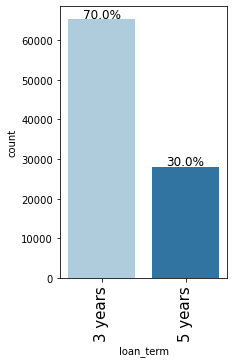

loan_grade


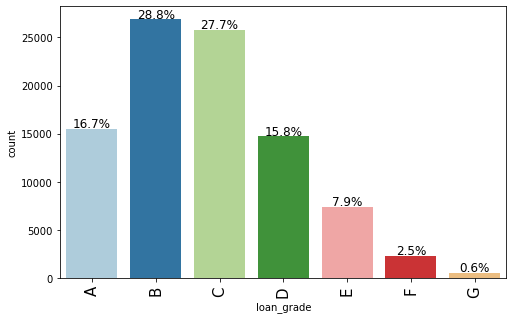

job_experience


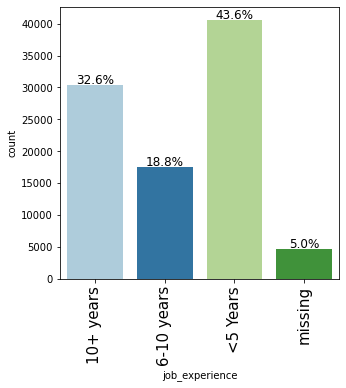

income_verification_status


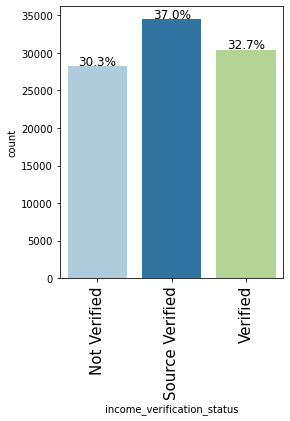

application_type


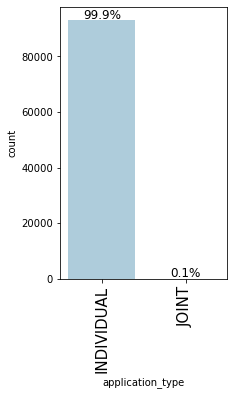

<IPython.core.display.Javascript object>

In [41]:
## check data distribution for all category columns
for col_name in category_cols:
    print(col_name)
    labeled_barplot(data=data, feature=col_name, perc=True)

loan_term
default        0      1    All
loan_term                     
All        71045  22129  93174
3 years    47345  17866  65211
5 years    23700   4263  27963
------------------------------------------------------------------------------------------------------------------------


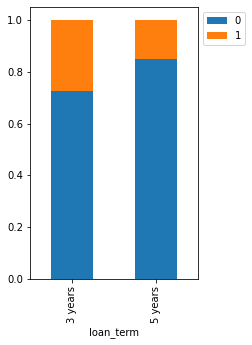

loan_grade
default         0      1    All
loan_grade                     
All         71045  22129  93174
B           19787   7078  26865
C           20203   5584  25787
A           11281   4253  15534
D           11478   3237  14715
E            6003   1375   7378
F            1862    482   2344
G             431    120    551
------------------------------------------------------------------------------------------------------------------------


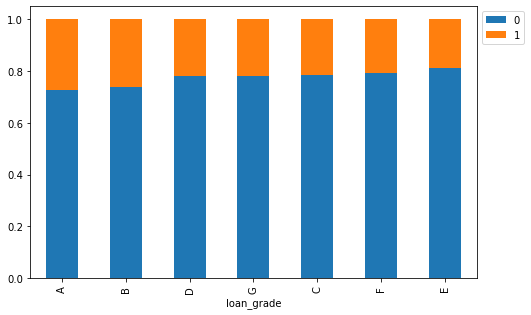

job_experience
default             0      1    All
job_experience                     
All             71045  22129  93174
<5 Years        30377  10233  40610
10+ years       23656   6706  30362
6-10 years      13107   4393  17500
missing          3905    797   4702
------------------------------------------------------------------------------------------------------------------------


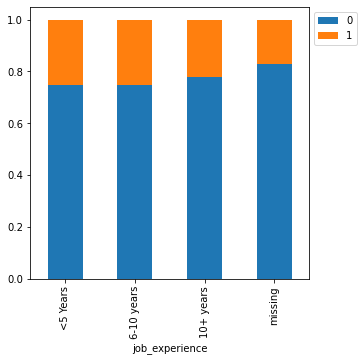

income_verification_status
default                         0      1    All
income_verification_status                     
All                         71045  22129  93174
Not Verified                20329   7908  28237
Verified                    22654   7796  30450
Source Verified             28062   6425  34487
------------------------------------------------------------------------------------------------------------------------


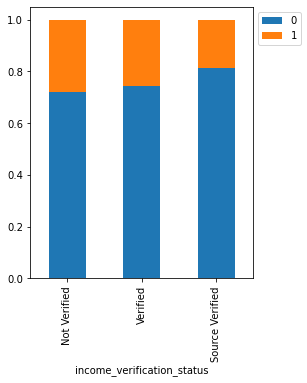

application_type
default               0      1    All
application_type                     
INDIVIDUAL        70989  22129  93118
All               71045  22129  93174
JOINT                56      0     56
------------------------------------------------------------------------------------------------------------------------


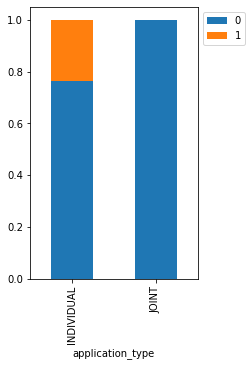

<IPython.core.display.Javascript object>

In [42]:
## check data distribution for all category columns
for col_name in category_cols:
    print(col_name)
    stacked_barplot(data, col_name, TARGET_COLUMN)


### Numerical Features -  Checking Data distributions

##### Lets check features with log transformation 

In [43]:
cols_to_log = numerical_cols
"""
for colname in cols_to_log:
    plt.hist(data[colname], bins=20)
    plt.title(colname)
    plt.show()
    plt.hist(np.log(data[colname]+0.0001), 20)
    plt.title(f'log transformation({colname})')
    plt.show()
"""
"""
data_log = data.copy()

for colname in cols_to_log:
    fig, axes = plt.subplots(1, 2, figsize=(16, 10))
    fig.suptitle(f"Normal  & Log transformation for {colname}", fontsize=20)
    data_log[colname] = np.log(data[colname]+0.0001)
    sns.histplot(ax=axes[0], data=data, x=colname)
    sns.histplot(ax=axes[1], data=data_log, x=colname)
    plt.show()
"""

'\ndata_log = data.copy()\n\nfor colname in cols_to_log:\n    fig, axes = plt.subplots(1, 2, figsize=(16, 10))\n    fig.suptitle(f"Normal  & Log transformation for {colname}", fontsize=20)\n    data_log[colname] = np.log(data[colname]+0.0001)\n    sns.histplot(ax=axes[0], data=data, x=colname)\n    sns.histplot(ax=axes[1], data=data_log, x=colname)\n    plt.show()\n'

<IPython.core.display.Javascript object>

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import scipy.stats as stats
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

<IPython.core.display.Javascript object>

In [45]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification(X_train,X_test,y_train,y_test,name, model):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    print(f"Model '{name}' performance \n\n")

    predictors_train = X_train
    target_train = y_train

    predictors_test = X_test
    target_test = y_test

    # predicting training data using the independent variables
    pred_train = model.predict(predictors_train)

    acc_train = accuracy_score(target_train, pred_train)  # to compute Accuracy
    recall_train = recall_score(target_train, pred_train)  # to compute Recall
    precision_train = precision_score(target_train, pred_train)  # to compute Precision
    f1_train = f1_score(target_train, pred_train)  # to compute F1-score
    roc_train = roc_auc_score(target_train, pred_train)  # to compute ROC AUC

    # predicting test data using the independent variables
    pred_test = model.predict(predictors_test)

    acc_test = accuracy_score(target_test, pred_test)  # to compute Accuracy
    recall_test = recall_score(target_test, pred_test)  # to compute Recall
    precision_test = precision_score(target_test, pred_test)  # to compute Precision
    f1_test = f1_score(target_test, pred_test)  # to compute F1-score
    roc_test = roc_auc_score(target_test, pred_test)  # to compute ROC AUC

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        [
            {
                "Model": name,
                "Data":"Training",
                "Shape":X_train.shape,
                "Recall": np.round_(recall_train * 100, decimals=3),
                "F1-Score": np.round_(f1_train * 100, decimals=3),
                "Accuracy": np.round_(acc_train * 100, decimals=3),
                "Precision": np.round_(precision_train * 100, decimals=3),
                "ROC-AUC": np.round_(roc_train * 100, decimals=3),
            },{  "Model": name,
                "Data":"Test",
                "Shape":X_train.shape,
                "Recall": np.round_(recall_test * 100, decimals=3),
                "F1-Score": np.round_(f1_test * 100, decimals=3),
                "Accuracy": np.round_(acc_test * 100, decimals=3),
                "Precision": np.round_(precision_test * 100, decimals=3),
                "ROC-AUC": np.round_(roc_test * 100, decimals=3),
            },
        ]
    )
    return df_perf


<IPython.core.display.Javascript object>

In [46]:
def confusion_matrix_classification(X_train,X_test,y_train,y_test,name, model):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    sns.set_context(
        "paper", rc={"font.size": 14, "axes.titlesize": 14, "axes.labelsize": 14}
    )
    print(f"Model '{name}' confusion matrix \n\n")

    predictors_train = X_train
    target_train = y_train

    predictors_test = X_test
    target_test = y_test

    y_pred_train = model.predict(predictors_train)
    y_pred_test = model.predict(predictors_test)

    cm_train = confusion_matrix(target_train, y_pred_train)
    cm_test = confusion_matrix(target_test, y_pred_test)

    plt.rcParams["figure.figsize"] = [12, 6]
    plt.rcParams["figure.autolayout"] = True

    f, axes = plt.subplots(1, 2)

    labels = np.asarray(
        [
            [
                "{0:0.0f}".format(item)
                + "\n{0:.2%}".format(item / cm_train.flatten().sum())
            ]
            for item in cm_train.flatten()
        ]
    ).reshape(2, 2)

    labels_test = np.asarray(
        [
            [
                "{0:0.0f}".format(item)
                + "\n{0:.2%}".format(item / cm_test.flatten().sum())
            ]
            for item in cm_test.flatten()
        ]
    ).reshape(2, 2)

    g = sns.heatmap(cm_train, annot=labels, fmt="", ax=axes[0])
    g.set(xlabel="True labe", ylabel="Predicted label", title="Training Data")

    g1 = sns.heatmap(cm_test, annot=labels_test, fmt="", ax=axes[1])
    g1.set(xlabel="True labe", ylabel="Predicted label", title="Test Data")



<IPython.core.display.Javascript object>


### Data correlation analysis

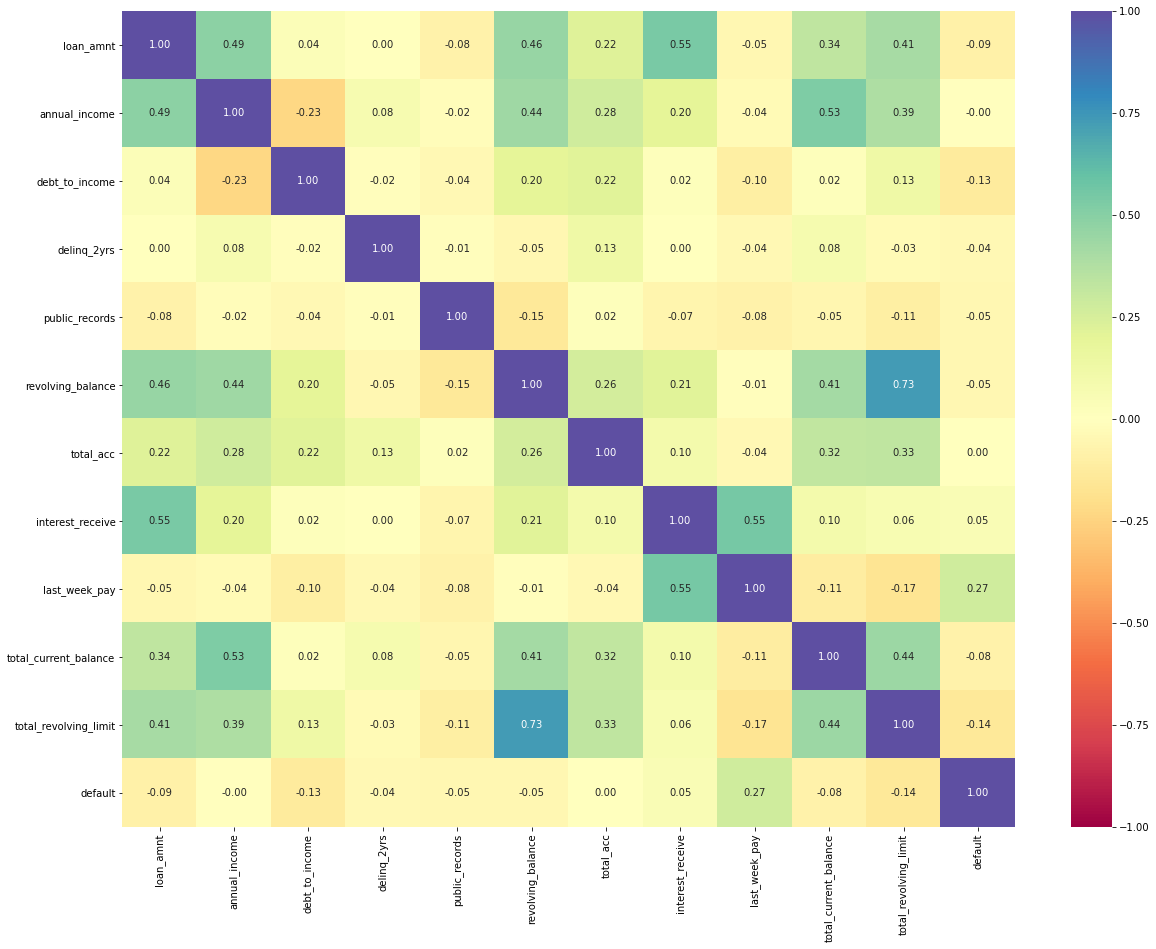

<IPython.core.display.Javascript object>

In [47]:
plt.figure(figsize=(20, 15))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

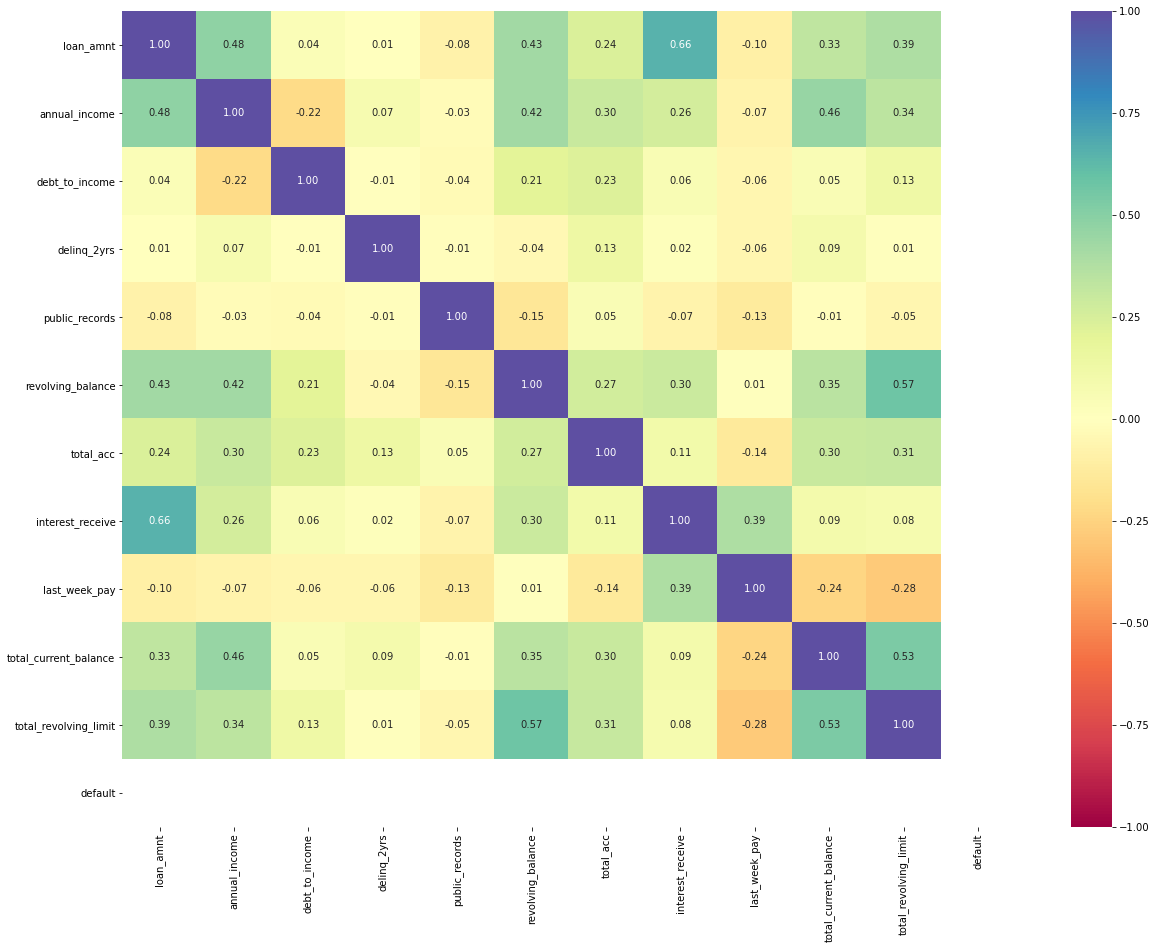

<IPython.core.display.Javascript object>

In [48]:
plt.figure(figsize=(20, 15))
sns.heatmap(
    data[data["default"] == 1].corr(),
    annot=True,
    vmin=-1,
    vmax=1,
    fmt=".2f",
    cmap="Spectral",
)
plt.show()

### Pair Plot analysis

In [49]:
# plt.figure(figsize=(30, 15))
# sns.pairplot(data, hue="default", corner=True, palette="deep")
# plt.show()

<IPython.core.display.Javascript object>

### Creating Functions to create output files

In [50]:
## Generate Validation output


def create_validation_output(input_data, model, output_file_name):
    print(f"input data shape : {input_data.shape}")
    print()
    output_df = pd.DataFrame()
    output_df["ID"] = loan_orig_submit_data["ID"]
    output_df["default"] = model.predict(input_data)
    print(f"generated output shape : {output_df.shape}")
    output_df.to_csv("output/" + output_file_name, index=False)
    # from google.colab import files
    # files.download(output_file_name)
    print(output_df["default"].value_counts(normalize=True) * 100)
    print()

<IPython.core.display.Javascript object>

In [51]:
plt.figure(figsize=(30, 15))
# sns.pairplot(data, corner=True, palette="deep")
plt.show()

<Figure size 2160x1080 with 0 Axes>

<IPython.core.display.Javascript object>

In [52]:
# Import modules for feature engineering and modelling
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression


<IPython.core.display.Javascript object>

In [53]:
# Partition data
X_train, X_test, y_train, y_test = train_test_split(
    # data.drop(TARGET_COLUMN, axis=1),
    data[REQUIRED_COLUMNS_FOR_TRAINING],
    data[TARGET_COLUMN],
    test_size=0.1,
    random_state=RANDOM_SEED_VAL,
)

X_submit_test = data_submit[REQUIRED_COLUMNS_FOR_TRAINING]

<IPython.core.display.Javascript object>

In [54]:
print(X_train.shape, X_test.shape)

(83856, 16) (9318, 16)


<IPython.core.display.Javascript object>

In [55]:
y_train.value_counts(normalize=True)

0    0.762164
1    0.237836
Name: default, dtype: float64

<IPython.core.display.Javascript object>

In [56]:
y_test.value_counts(normalize=True)

0    0.765508
1    0.234492
Name: default, dtype: float64

<IPython.core.display.Javascript object>

### Create Pipeline

In [57]:
# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To be used for missing value imputation
from sklearn.impute import SimpleImputer

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from time import time

<IPython.core.display.Javascript object>

In [58]:
# For Log Transform
def log_transform(x):
    return np.log(x + 0.001)


# Collect all Numerical Columns that needs imputation

numerical_features = list(X_train.select_dtypes("number").columns)

log_transform_features = list(X_train.select_dtypes("number").columns)

# Collect all Categorical Columns that needs imputation
categorical_features = list(X_train.select_dtypes("object").columns)


categorical_features_cat = list(X_train.select_dtypes("category").columns)
for col_name in categorical_features_cat:
    categorical_features.append(col_name)


print(f"numerical_features columns are: {numerical_features}")
print(f"log_transform_features columns are: {log_transform_features}")
print(f"categorical_features columns are: {categorical_features}")

print()
print("before transform train and test shape")

# creating a transformer for numerical variables, which will apply simple imputer on the numerical variables
numeric_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("log", FunctionTransformer(log_transform)),
        #("scale", StandardScaler()),
    ]
)


# creating a transformer for numerical variables with data skewness Log Transformation
# numeric_log_transformer = Pipeline(steps=[("log", FunctionTransformer(log_transform))])

# Define categorical pipeline
cat_pipe = Pipeline(
    [
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("encoder", OneHotEncoder(handle_unknown="ignore", sparse=False)),
    ]
)

# Fit column transformer to training data
preprocessor = ColumnTransformer(
    [
        ("num", numeric_transformer, numerical_features),
        ("cat", cat_pipe, categorical_features),
    ],
    remainder="passthrough",
)
preprocessor.fit(X_train)


# Prepare column names
cat_columns = preprocessor.named_transformers_["cat"]["encoder"].get_feature_names(categorical_features)
#cat_columns = categorical_features
columns = np.append(numerical_features, cat_columns)


#print(f"new columns are: {columns}")

X_train_trans = pd.DataFrame(preprocessor.transform(X_train), columns=columns)
X_test_trans = pd.DataFrame(preprocessor.transform(X_test), columns=columns)
print()
print("after transform train and test shape")
print(X_train_trans.shape, X_test_trans.shape)

# Inspect training data before and after
# print("******************** Training data ********************")
# display(X_train)
# display(pd.DataFrame(preprocessor.transform(X_train), columns=columns))

# Inspect test data before and after
# print("******************** Test data ********************")
# display(X_test)
# display(pd.DataFrame(preprocessor.transform(X_test), columns=columns))



numerical_features columns are: ['loan_amnt', 'annual_income', 'debt_to_income', 'delinq_2yrs', 'public_records', 'revolving_balance', 'total_acc', 'interest_receive', 'last_week_pay', 'total_current_balance', 'total_revolving_limit']
log_transform_features columns are: ['loan_amnt', 'annual_income', 'debt_to_income', 'delinq_2yrs', 'public_records', 'revolving_balance', 'total_acc', 'interest_receive', 'last_week_pay', 'total_current_balance', 'total_revolving_limit']
categorical_features columns are: ['loan_term', 'loan_grade', 'job_experience', 'income_verification_status', 'application_type']

before transform train and test shape

after transform train and test shape
(83856, 29) (9318, 29)


<IPython.core.display.Javascript object>

# Data Summary after transformation

In [59]:
## data shape
X_train_trans.shape

(83856, 29)

<IPython.core.display.Javascript object>

In [60]:
numerical_cols_without_target = numerical_cols.copy()

numerical_cols_without_target.remove("default")

<IPython.core.display.Javascript object>

In [61]:
X_train_trans[numerical_cols_without_target].sample(20)

,loan_amnt,revolving_balance,annual_income,debt_to_income,delinq_2yrs,public_records,total_acc,interest_receive,last_week_pay,total_current_balance,total_revolving_limit
372,9.903488,10.081299,11.259323,3.238325,-6.907755,-6.907755,3.610945,6.447022,2.833272,12.149836,10.980195
51306,8.294050,9.407551,10.985293,1.996196,-6.907755,-6.907755,2.890427,4.534758,2.565026,9.682155,9.878170
47415,10.064756,9.751327,11.198215,2.387018,-6.907755,-6.907755,3.135538,9.093656,5.459590,-6.907755,-6.907755
41272,10.463103,9.822874,11.561716,2.857676,-6.907755,-6.907755,3.135538,7.831403,3.258135,10.678560,9.867860
55173,10.386685,10.278700,11.396392,3.450337,-6.907755,0.001000,3.434019,9.012252,4.110890,12.040042,10.532096
56648,8.006368,7.872837,10.680516,3.104183,-6.907755,-6.907755,2.772651,6.442128,4.025370,11.018252,8.294050
63518,9.210340,8.632484,11.200951,1.706746,-6.907755,-6.907755,2.639129,6.742894,3.784212,8.783703,10.367222
37614,10.085809,10.730575,11.156251,3.641552,-6.907755,-6.907755,3.583547,7.675407,3.663587,11.461264,11.294769
14289,10.463103,7.790696,11.512925,2.822628,-6.907755,0.001000,3.044570,-6.907755,-6.907755,12.226674,9.392662
69387,10.463103,10.160569,11.982929,3.033076,-6.907755,-6.907755,3.044570,-6.907755,-6.907755,10.838345,11.055641


<IPython.core.display.Javascript object>

loan_amnt
revolving_balance
annual_income
debt_to_income
delinq_2yrs
public_records
total_acc
interest_receive
last_week_pay
total_current_balance
total_revolving_limit


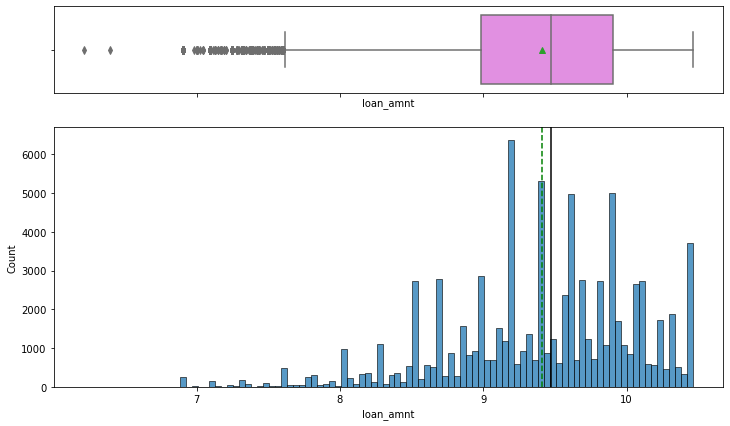

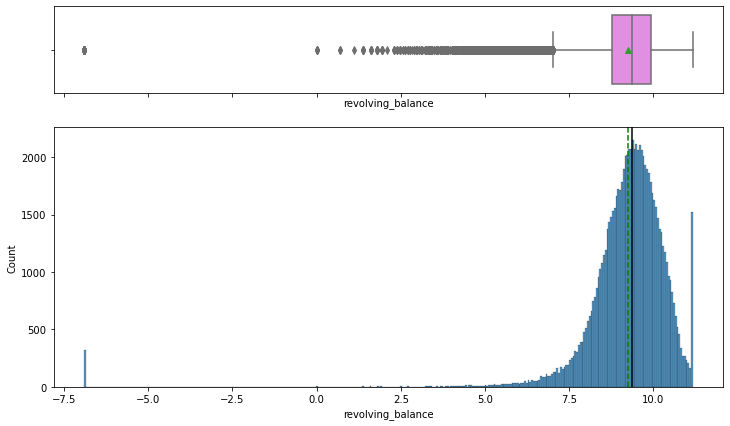

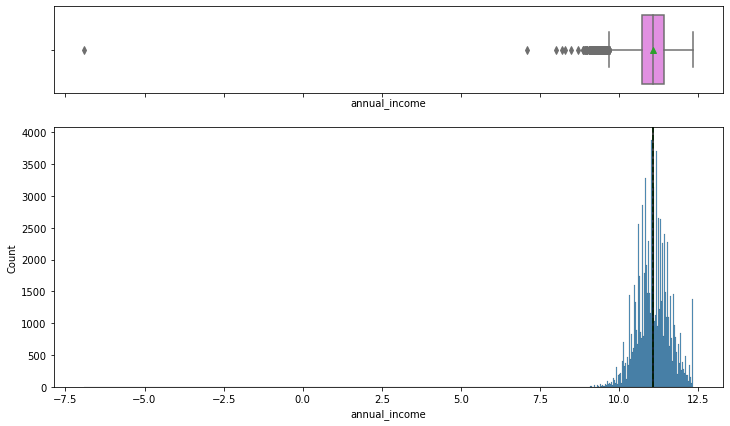

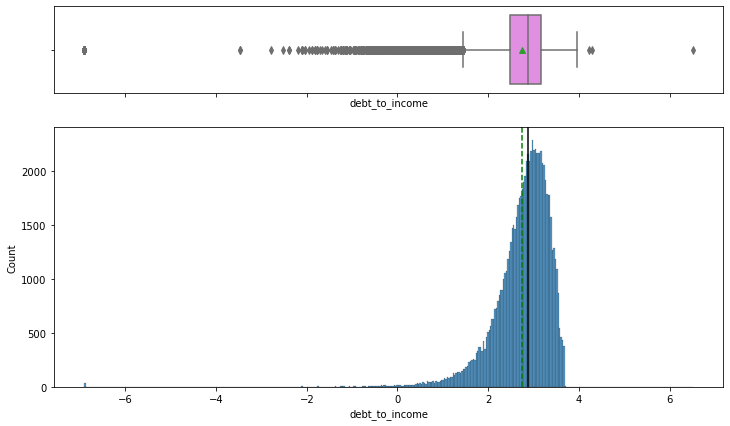

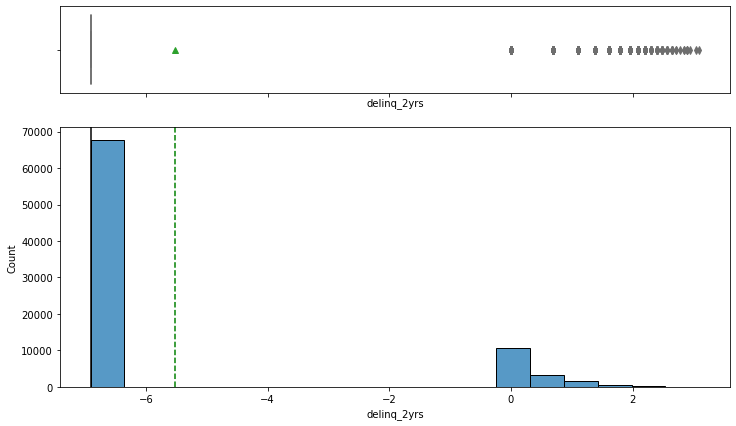

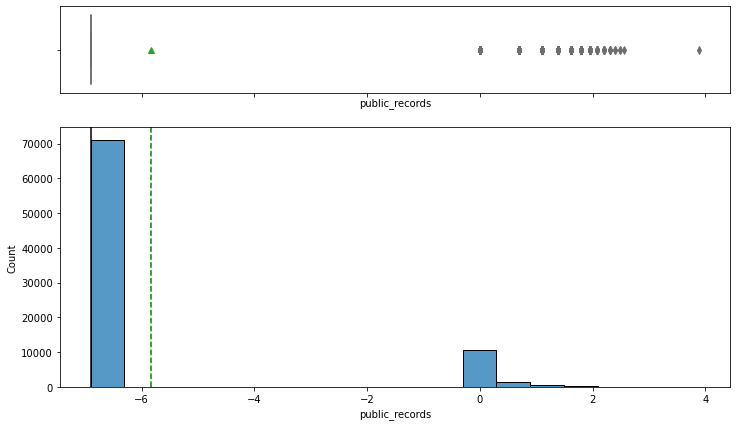

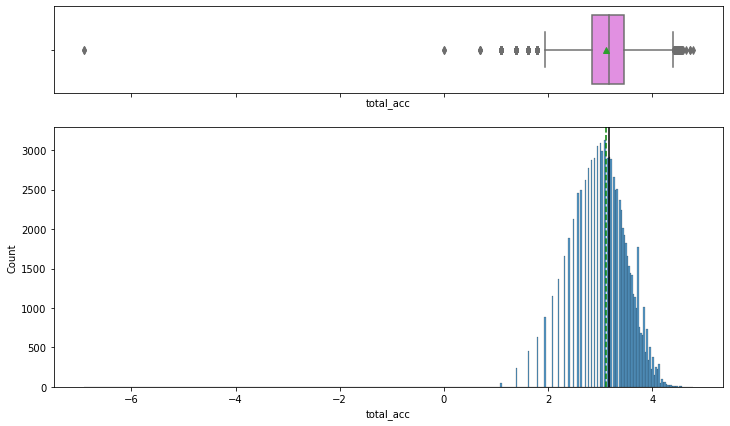

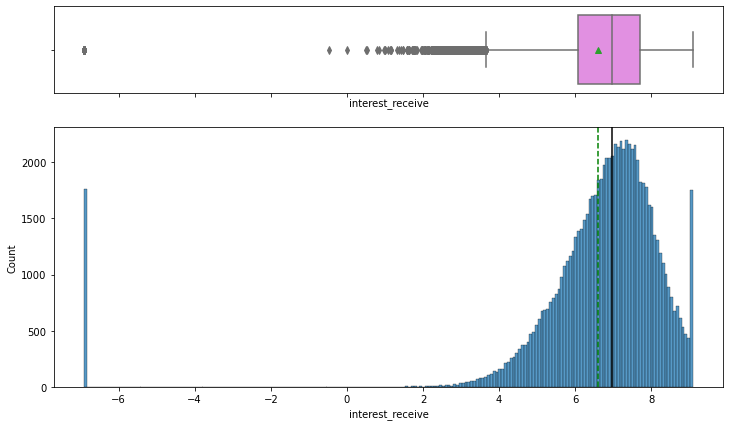

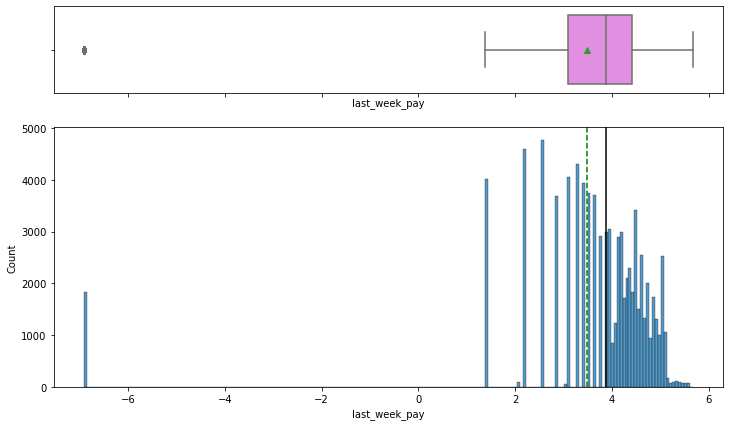

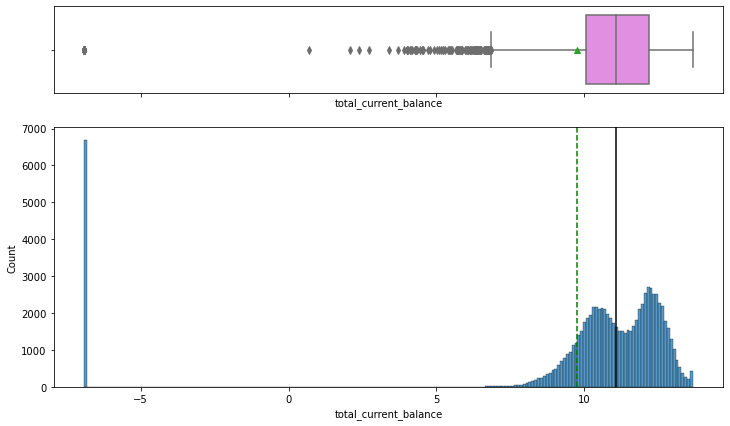

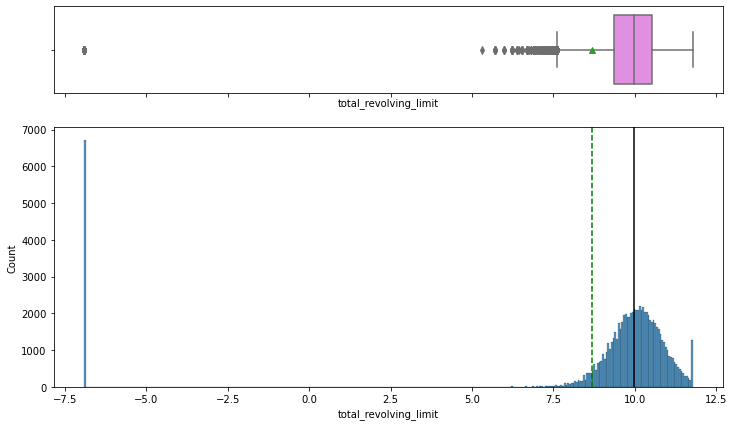

<IPython.core.display.Javascript object>

In [62]:

## check data distribution for all numerical
for col_name in numerical_cols_without_target:
    print(col_name)
    histogram_boxplot(X_train_trans, col_name)




loan_amnt


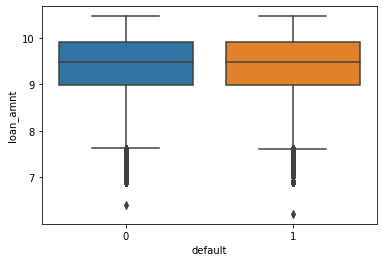

revolving_balance


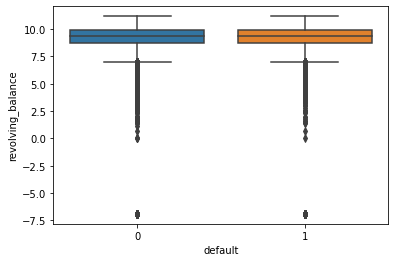

annual_income


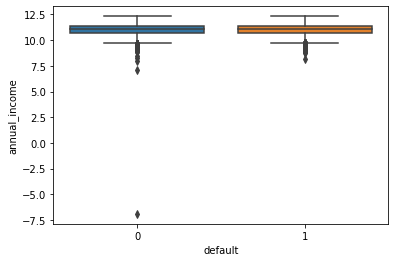

debt_to_income


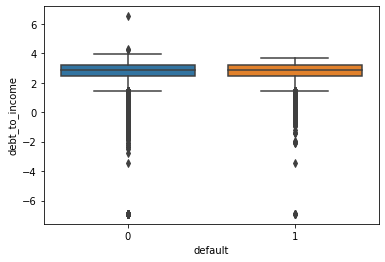

delinq_2yrs


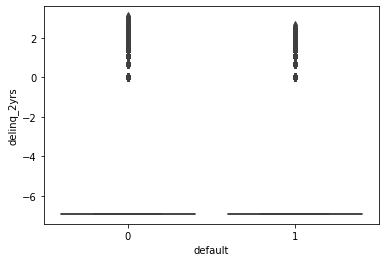

public_records


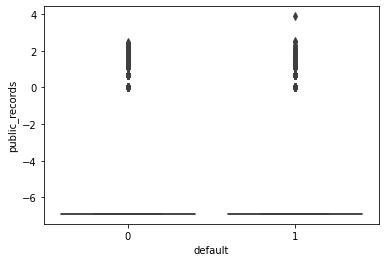

total_acc


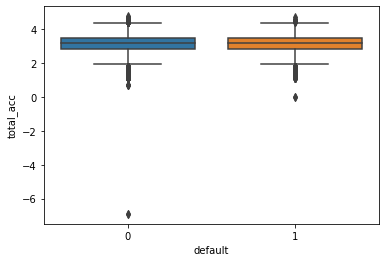

interest_receive


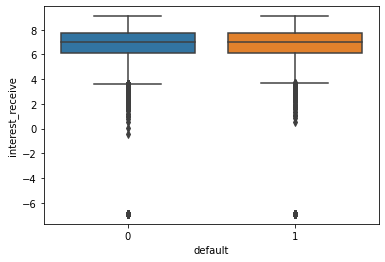

last_week_pay


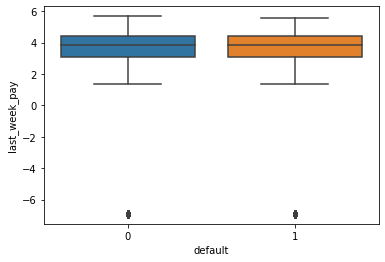

total_current_balance


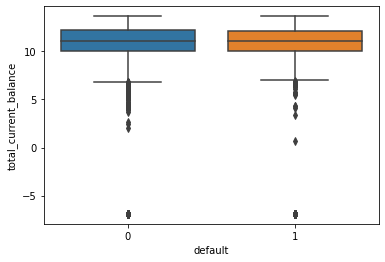

total_revolving_limit


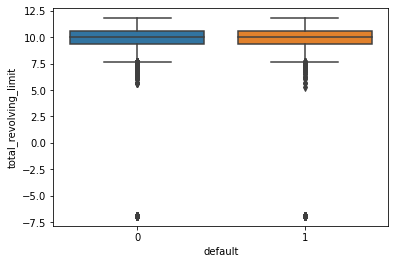

<IPython.core.display.Javascript object>

In [63]:
## check data distribution for all numerical
for col_name in numerical_cols_without_target:
    print(col_name)
    sns.boxplot(data[TARGET_COLUMN], X_train_trans[col_name])
    plt.show()

In [64]:
# training shape
X_train_trans.shape

(83856, 29)

<IPython.core.display.Javascript object>

In [65]:
y_train.value_counts(normalize=True)

0    0.762164
1    0.237836
Name: default, dtype: float64

<IPython.core.display.Javascript object>

In [66]:
### Oversampling train data using SMOTE

<IPython.core.display.Javascript object>

In [67]:
# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


<IPython.core.display.Javascript object>

In [68]:
"""
print("Before UpSampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before UpSampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("Before UpSampling, the shape of train_X: {}".format(X_train_trans.shape))
print("Before UpSampling, the shape of train_y: {} \n".format(y_train.shape))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_trans, y_train = sm.fit_resample(X_train_trans, y_train)


print("After UpSampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("After UpSampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

"""


'\nprint("Before UpSampling, counts of label \'Yes\': {}".format(sum(y_train == 1)))\nprint("Before UpSampling, counts of label \'No\': {} \n".format(sum(y_train == 0)))\n\nprint("Before UpSampling, the shape of train_X: {}".format(X_train_trans.shape))\nprint("Before UpSampling, the shape of train_y: {} \n".format(y_train.shape))\n\nsm = SMOTE(\n    sampling_strategy=1, k_neighbors=5, random_state=1\n)  # Synthetic Minority Over Sampling Technique\nX_train_trans, y_train = sm.fit_resample(X_train_trans, y_train)\n\n\nprint("After UpSampling, counts of label \'Yes\': {}".format(sum(y_train == 1)))\nprint("After UpSampling, counts of label \'No\': {} \n".format(sum(y_train == 0)))\n\n'

<IPython.core.display.Javascript object>

# Random Forest Classifier

In [69]:
"""
start = time()
# trying a RandomForestClassifier model

# precision

model_tuned_rf = RandomForestClassifier(
    random_state=32,
    n_jobs=-1,
    n_estimators=400,
    min_impurity_decrease=0.001,
    max_features=None,
    max_depth=None,
    criterion="entropy",
    verbose = 1,
    class_weight= {0: 0.3, 1: 0.7}
)


# Train Model
model_tuned_rf.fit(X_train_trans, y_train)
"""


'\nstart = time()\n# trying a RandomForestClassifier model\n\n# precision\n\nmodel_tuned_rf = RandomForestClassifier(\n    random_state=32,\n    n_jobs=-1,\n    n_estimators=400,\n    min_impurity_decrease=0.001,\n    max_features=None,\n    max_depth=None,\n    criterion="entropy",\n    verbose = 1,\n    class_weight= {0: 0.3, 1: 0.7}\n)\n\n\n# Train Model\nmodel_tuned_rf.fit(X_train_trans, y_train)\n'

<IPython.core.display.Javascript object>

In [70]:
"""
print("RandomForestClassifier took %.2f seconds." % ((time() - start)))

model_tuned_model_perf = model_performance_classification(
    X_train_trans,
    X_test_trans,
    y_train,
    y_test,
    "Model based on learning",
    model_tuned_rf,
)
model_tuned_model_perf
"""

'\nprint("RandomForestClassifier took %.2f seconds." % ((time() - start)))\n\nmodel_tuned_model_perf = model_performance_classification(\n    X_train_trans,\n    X_test_trans,\n    y_train,\n    y_test,\n    "Model based on learning",\n    model_tuned_rf,\n)\nmodel_tuned_model_perf\n'

<IPython.core.display.Javascript object>

In [71]:
"""
x_test_results = model_tuned_rf.predict(X_test_trans)

result = x_test_results == y_test
print("Total % perdicted correct and not")
result.value_counts(normalize=True)
"""

'\nx_test_results = model_tuned_rf.predict(X_test_trans)\n\nresult = x_test_results == y_test\nprint("Total % perdicted correct and not")\nresult.value_counts(normalize=True)\n'

<IPython.core.display.Javascript object>

In [72]:
"""
confusion_matrix_classification(
    X_train_trans,
    X_test_trans,
    y_train,
    y_test,
    "Model based on learning",
    model_tuned_rf,
)
"""

'\nconfusion_matrix_classification(\n    X_train_trans,\n    X_test_trans,\n    y_train,\n    y_test,\n    "Model based on learning",\n    model_tuned_rf,\n)\n'

<IPython.core.display.Javascript object>

In [73]:
"""

X_submit_test_trans = pd.DataFrame(
    preprocessor.transform(X_submit_test), columns=columns
)

create_validation_output(X_submit_test_trans, model_tuned_rf, "rf_tuned_model_output.csv")
"""

'\n\nX_submit_test_trans = pd.DataFrame(\n    preprocessor.transform(X_submit_test), columns=columns\n)\n\ncreate_validation_output(X_submit_test_trans, model_tuned_rf, "rf_tuned_model_output.csv")\n'

<IPython.core.display.Javascript object>

In [74]:
"""
# feature_importances_

feature_names = X_train_trans.columns
importances = model_tuned_rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 30))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()
"""

'\n# feature_importances_\n\nfeature_names = X_train_trans.columns\nimportances = model_tuned_rf.feature_importances_\nindices = np.argsort(importances)\n\nplt.figure(figsize=(10, 30))\nplt.title("Feature Importances")\nplt.barh(range(len(indices)), importances[indices], color="violet", align="center")\nplt.yticks(range(len(indices)), [feature_names[i] for i in indices])\nplt.xlabel("Relative Importance")\nplt.show()\n'

<IPython.core.display.Javascript object>

# AdaBoost Classifier

In [75]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

<IPython.core.display.Javascript object>

In [76]:
# trying a AdaBoostClassifier model
"""
# f1

model_tuned_ab = AdaBoostClassifier(
    n_estimators=400,
    learning_rate=0.0001,
    base_estimator=DecisionTreeClassifier(
        class_weight={0: 0.24, 1: 0.76}, max_depth=3, random_state=32
    ),
)

# Train Model
model_tuned_ab.fit(X_train_trans, y_train)


model_tuned_model_perf = model_performance_classification(
    X_train_trans,
    X_test_trans,
    y_train,
    y_test,
    "Model based on learning",
    model_tuned_ab,
)
model_tuned_model_perf
"""

'\n# f1\n\nmodel_tuned_ab = AdaBoostClassifier(\n    n_estimators=400,\n    learning_rate=0.0001,\n    base_estimator=DecisionTreeClassifier(\n        class_weight={0: 0.24, 1: 0.76}, max_depth=3, random_state=32\n    ),\n)\n\n# Train Model\nmodel_tuned_ab.fit(X_train_trans, y_train)\n\n\nmodel_tuned_model_perf = model_performance_classification(\n    X_train_trans,\n    X_test_trans,\n    y_train,\n    y_test,\n    "Model based on learning",\n    model_tuned_ab,\n)\nmodel_tuned_model_perf\n'

<IPython.core.display.Javascript object>

In [77]:
"""
confusion_matrix_classification(
    X_train_trans,
    X_test_trans,
    y_train,
    y_test,
    "Model based on learning",
    model_tuned_ab,
)
"""

'\nconfusion_matrix_classification(\n    X_train_trans,\n    X_test_trans,\n    y_train,\n    y_test,\n    "Model based on learning",\n    model_tuned_ab,\n)\n'

<IPython.core.display.Javascript object>

In [78]:
"""

X_submit_test_trans = pd.DataFrame(
    preprocessor.transform(X_submit_test), columns=columns
)

create_validation_output(X_submit_test_trans, model_tuned_ab, "ab_tuned_model_output.csv")
"""


'\n\nX_submit_test_trans = pd.DataFrame(\n    preprocessor.transform(X_submit_test), columns=columns\n)\n\ncreate_validation_output(X_submit_test_trans, model_tuned_ab, "ab_tuned_model_output.csv")\n'

<IPython.core.display.Javascript object>

# KNeighborsClassifier

In [79]:
"""
start = time()
# Training the K-NN model on the Training set
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=3, metric="minkowski", p=2, n_jobs=-1)
classifier.fit(X_train_trans, y_train)
print("KNeighborsClassifier took %.2f seconds." % ((time() - start)))
"""

'\nstart = time()\n# Training the K-NN model on the Training set\nfrom sklearn.neighbors import KNeighborsClassifier\n\nclassifier = KNeighborsClassifier(n_neighbors=3, metric="minkowski", p=2, n_jobs=-1)\nclassifier.fit(X_train_trans, y_train)\nprint("KNeighborsClassifier took %.2f seconds." % ((time() - start)))\n'

<IPython.core.display.Javascript object>

In [80]:
"""
model_tuned_model_perf = model_performance_classification(
    X_train_trans, X_test_trans, y_train, y_test, "Model based on learning", classifier,
)
model_tuned_model_perf
"""

'\nmodel_tuned_model_perf = model_performance_classification(\n    X_train_trans, X_test_trans, y_train, y_test, "Model based on learning", classifier,\n)\nmodel_tuned_model_perf\n'

<IPython.core.display.Javascript object>

In [81]:
"""
confusion_matrix_classification(
    X_train_trans, X_test_trans, y_train, y_test, "Model based on learning", classifier,
)
"""

'\nconfusion_matrix_classification(\n    X_train_trans, X_test_trans, y_train, y_test, "Model based on learning", classifier,\n)\n'

<IPython.core.display.Javascript object>

In [82]:
"""

X_submit_test_trans = pd.DataFrame(
    preprocessor.transform(X_submit_test), columns=columns
)

create_validation_output(X_submit_test_trans, classifier, "knn_tuned_model_output.csv")
"""

'\n\nX_submit_test_trans = pd.DataFrame(\n    preprocessor.transform(X_submit_test), columns=columns\n)\n\ncreate_validation_output(X_submit_test_trans, classifier, "knn_tuned_model_output.csv")\n'

<IPython.core.display.Javascript object>

# Gradient Boosting Classifier

In [83]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

<IPython.core.display.Javascript object>

In [84]:
start = time()
# trying a GradientBoostingClassifier model

# roc_auc

# 87.5 score
"""
model_tuned_gb = GradientBoostingClassifier(
    random_state=1,
    subsample=0.8,
    n_estimators=50,
    min_impurity_decrease=0.7,
    max_features="auto",
    max_depth=7,
    loss="deviance",
    learning_rate=0.7,
    verbose=10,
    min_samples_split=3,
)
"""

# 87.52 score
model_tuned_gb = GradientBoostingClassifier(
    random_state=1,
    subsample=0.9,
    n_estimators=50,
    min_impurity_decrease=0.3,
    verbose=10,
    max_features=0.9,
    max_depth=5,
    loss="exponential",
    learning_rate=0.2,
)


"""
model_tuned_gb = GradientBoostingClassifier(
    n_estimators=50,
    random_state=RANDOM_SEED_VAL,
    verbose=10,
    learning_rate=0.7,
    subsample=1,
    max_depth=4,
    min_impurity_decrease=0.6,
    max_features="auto",
    loss="deviance",
    min_samples_split=3,
)
"""

# Train Model
model_tuned_gb.fit(X_train_trans, y_train)

x_test_results = model_tuned_gb.predict(X_test_trans)

result = x_test_results == y_test
print("Total % perdicted correct and not")
result.value_counts(normalize=True)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.8208           0.0315           19.69s
         2           0.7985           0.0233           21.24s
         3           0.7803           0.0177           20.92s
         4           0.7652           0.0142           21.40s
         5           0.7538           0.0104           20.76s
         6           0.7450           0.0079           20.63s
         7           0.7390           0.0065           20.49s
         8           0.7317           0.0064           20.13s
         9           0.7282           0.0037           19.73s
        10           0.7234           0.0031           19.31s
        11           0.7201           0.0027           19.03s
        12           0.7171           0.0023           18.50s
        13           0.7159           0.0014           17.88s
        14           0.7127           0.0021           17.48s
        15           0.7098           0.0016           17.05s
       

True     0.828933
False    0.171067
Name: default, dtype: float64

<IPython.core.display.Javascript object>

In [85]:
print("GradientBoostingClassifier took %.2f seconds." % ((time() - start)))
model_tuned_model_perf = model_performance_classification(
    X_train_trans,
    X_test_trans,
    y_train,
    y_test,
    "Model based on learning",
    model_tuned_gb,
)
model_tuned_model_perf

GradientBoostingClassifier took 23.10 seconds.
Model 'Model based on learning' performance 




,Model,Data,Shape,Recall,F1-Score,Accuracy,Precision,ROC-AUC
0,Model based on learning,Training,"(83856, 29)",32.566,47.414,82.819,87.146,65.534
1,Model based on learning,Test,"(83856, 29)",31.350,46.221,82.893,87.933,65.016


<IPython.core.display.Javascript object>

Model 'Model based on learning' confusion matrix 




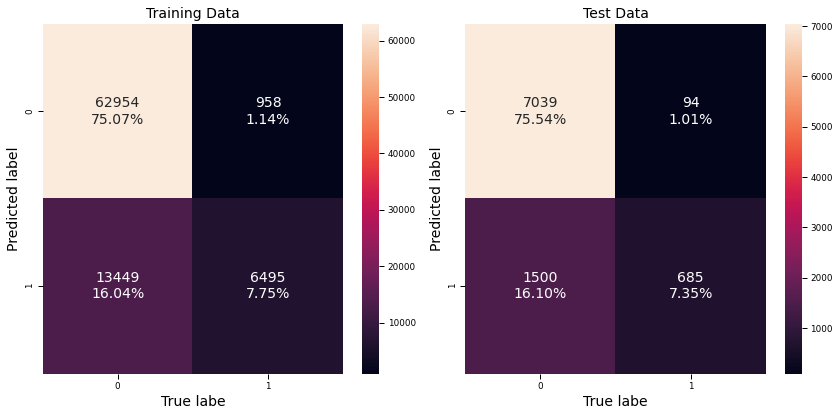

<IPython.core.display.Javascript object>

In [86]:
confusion_matrix_classification(
    X_train_trans,
    X_test_trans,
    y_train,
    y_test,
    "Model based on learning",
    model_tuned_gb,
)

In [87]:
x_test_results = model_tuned_gb.predict(X_test_trans)

result = x_test_results == y_test
print("Total % perdicted correct and not")
result.value_counts(normalize=True)

Total % perdicted correct and not


True     0.828933
False    0.171067
Name: default, dtype: float64

<IPython.core.display.Javascript object>

In [88]:


X_submit_test_trans = pd.DataFrame(
    preprocessor.transform(X_submit_test), columns=columns
)

create_validation_output(X_submit_test_trans, model_tuned_gb, "gb_tuned_model_output.csv")


input data shape : (39933, 29)

generated output shape : (39933, 2)
0    90.837152
1     9.162848
Name: default, dtype: float64



<IPython.core.display.Javascript object>

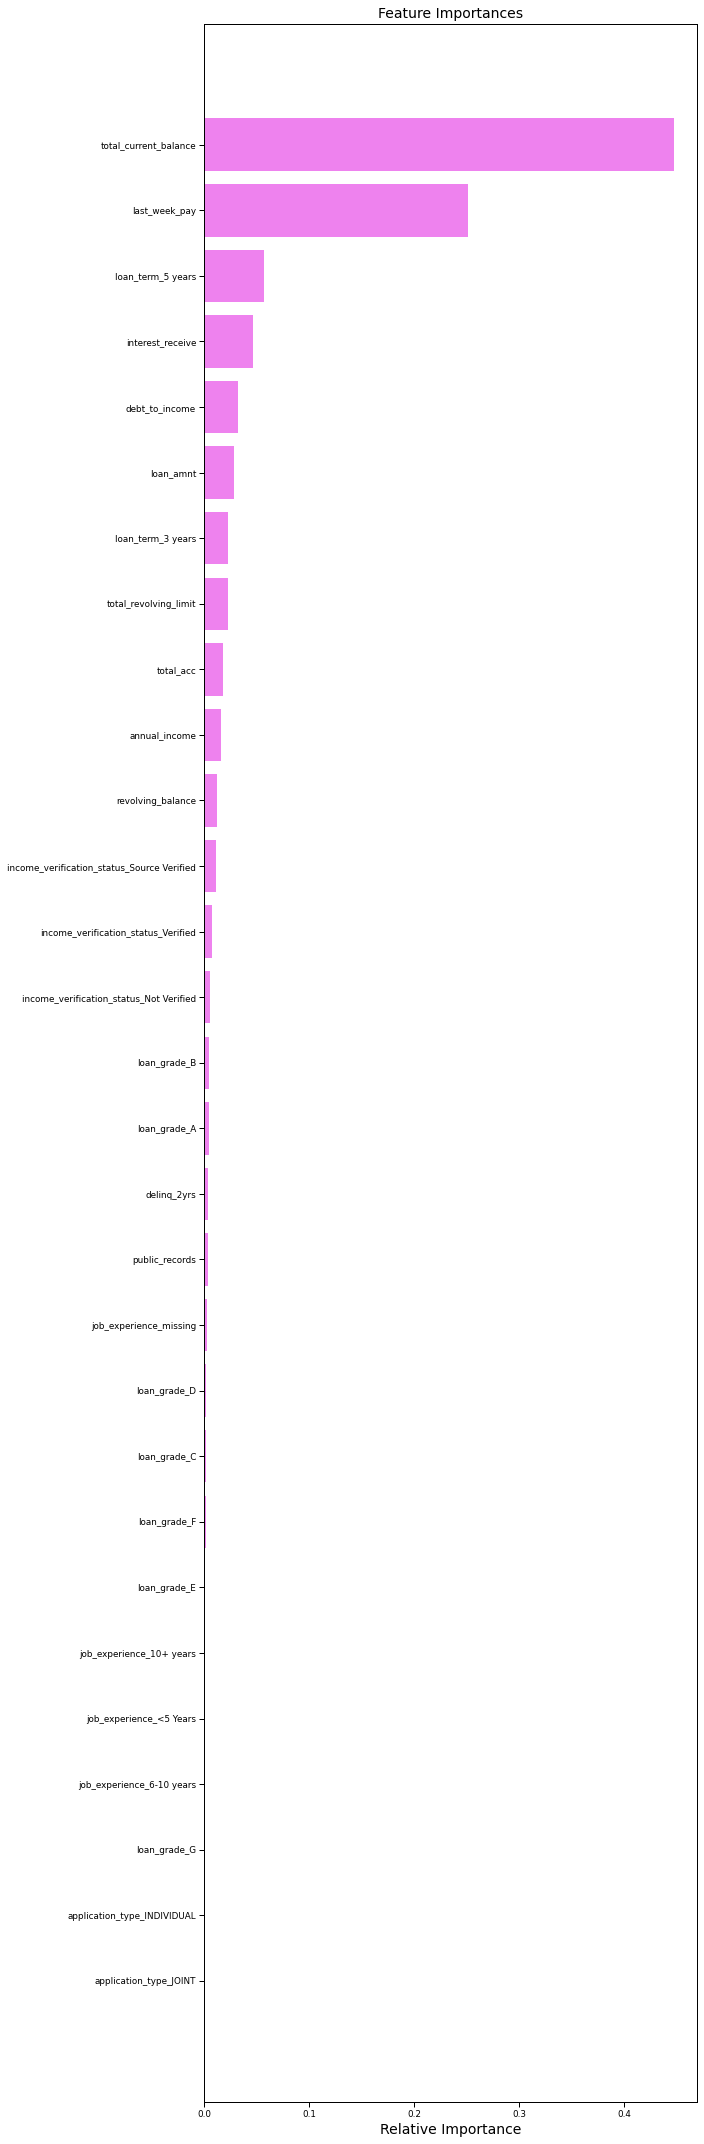

<IPython.core.display.Javascript object>

In [89]:

# feature_importances_

feature_names = X_train_trans.columns
importances = model_tuned_gb.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 30))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()


In [90]:
### Feature extraction - Applying Principal Component Analysis (PCA)

# to perform PCA
from sklearn.decomposition import PCA


<IPython.core.display.Javascript object>

In [91]:
# normalizing the features

scaled_X = StandardScaler().fit_transform(X_train_trans)
total_components=X_train_trans.shape[1]
pca = PCA(n_components=total_components)
pca_data = pca.fit_transform(scaled_X)

print(
    "Explained variance per principal component: {}".format(
        pca.explained_variance_ratio_
    )
)

pca.n_features_


Explained variance per principal component: [1.13242479e-01 8.04992844e-02 6.99181255e-02 6.43089589e-02
 5.81455134e-02 5.31026674e-02 5.08242880e-02 4.72204919e-02
 4.68803314e-02 4.46872911e-02 4.31372562e-02 4.20145236e-02
 3.87954765e-02 3.65362690e-02 3.52973725e-02 3.45815993e-02
 3.36342091e-02 3.15709791e-02 2.40144565e-02 2.00897515e-02
 1.73515015e-02 1.23282328e-02 9.72163495e-04 8.46778311e-04
 1.45149416e-31 1.69881106e-32 1.29087059e-32 8.07404091e-34
 7.24010011e-34]


29

<IPython.core.display.Javascript object>

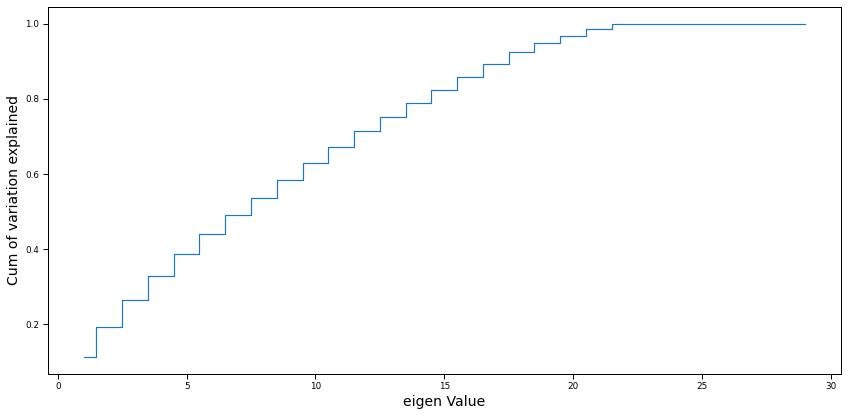

<IPython.core.display.Javascript object>

In [92]:
plt.step(
    list(range(1, total_components + 1)),
    np.cumsum(pca.explained_variance_ratio_),
    where="mid",
)
plt.ylabel("Cum of variation explained")
plt.xlabel("eigen Value")
plt.show()


In [93]:
"""
best_component_count = 32

pca3 = PCA(n_components=best_component_count)
pca3.fit(scaled_X)

Xpca3 = pca3.transform(scaled_X)
Xpca3_test = pca3.transform(X_test_trans)
"""

'\nbest_component_count = 32\n\npca3 = PCA(n_components=best_component_count)\npca3.fit(scaled_X)\n\nXpca3 = pca3.transform(scaled_X)\nXpca3_test = pca3.transform(X_test_trans)\n'

<IPython.core.display.Javascript object>

In [94]:
"""
start = time()
# trying a GradientBoostingClassifier model

# roc_auc

model_tuned_gb_pca = GradientBoostingClassifier(
    random_state=1,
    subsample=1,
    n_estimators=50,
    min_impurity_decrease=0.001,
    max_features=None,
    max_depth=10,
    loss="exponential",
    learning_rate=0.2,
    verbose = 10
)

# Train Model
model_tuned_gb_pca.fit(Xpca3, y_train)

"""

'\nstart = time()\n# trying a GradientBoostingClassifier model\n\n# roc_auc\n\nmodel_tuned_gb_pca = GradientBoostingClassifier(\n    random_state=1,\n    subsample=1,\n    n_estimators=50,\n    min_impurity_decrease=0.001,\n    max_features=None,\n    max_depth=10,\n    loss="exponential",\n    learning_rate=0.2,\n    verbose = 10\n)\n\n# Train Model\nmodel_tuned_gb_pca.fit(Xpca3, y_train)\n\n'

<IPython.core.display.Javascript object>

In [95]:
"""
print("PCA GradientBoostingClassifier took %.2f seconds." % ((time() - start)))
model_tuned_model_perf = model_performance_classification(
    Xpca3, Xpca3_test, y_train, y_test, "Model based on learning", model_tuned_gb_pca,
)
model_tuned_model_perf
"""

'\nprint("PCA GradientBoostingClassifier took %.2f seconds." % ((time() - start)))\nmodel_tuned_model_perf = model_performance_classification(\n    Xpca3, Xpca3_test, y_train, y_test, "Model based on learning", model_tuned_gb_pca,\n)\nmodel_tuned_model_perf\n'

<IPython.core.display.Javascript object>

In [96]:
"""
confusion_matrix_classification(
    Xpca3, Xpca3_test, y_train, y_test, "Model based on learning", model_tuned_gb_pca,
)
"""

'\nconfusion_matrix_classification(\n    Xpca3, Xpca3_test, y_train, y_test, "Model based on learning", model_tuned_gb_pca,\n)\n'

<IPython.core.display.Javascript object>

In [97]:
"""
submit_data_transformed = preprocessor.transform(X_submit_test)
X_submit_test_trans = pd.DataFrame(
    pca3.transform(submit_data_transformed)
)

create_validation_output(X_submit_test_trans, model_tuned_gb_pca, "pca_gb_tuned_model_output.csv")
"""

'\nsubmit_data_transformed = preprocessor.transform(X_submit_test)\nX_submit_test_trans = pd.DataFrame(\n    pca3.transform(submit_data_transformed)\n)\n\ncreate_validation_output(X_submit_test_trans, model_tuned_gb_pca, "pca_gb_tuned_model_output.csv")\n'

<IPython.core.display.Javascript object>